#***MNIST FASHION*** 🧥

---



###**PROJECT OVERVIEW**

The project involves building and training a deep learning model on the Fashion MNIST dataset. Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. The goal is to classify these images into categories such as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot.

###**DATA DESCRIPTION**

Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

###**LOADING LIBRARIES**

In [1]:
# basic
import numpy as np
import pandas as pd

#visulas
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import ResNet50


###**FETCH THE DATA**

In [2]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print('The shape of train',X_train.shape)

print('The shape of train_label',y_train.shape)

print('The shape of test',X_test.shape)

print('The shape of test_label',y_test.shape)

The shape of train (60000, 28, 28)
The shape of train_label (60000,)
The shape of test (10000, 28, 28)
The shape of test_label (10000,)


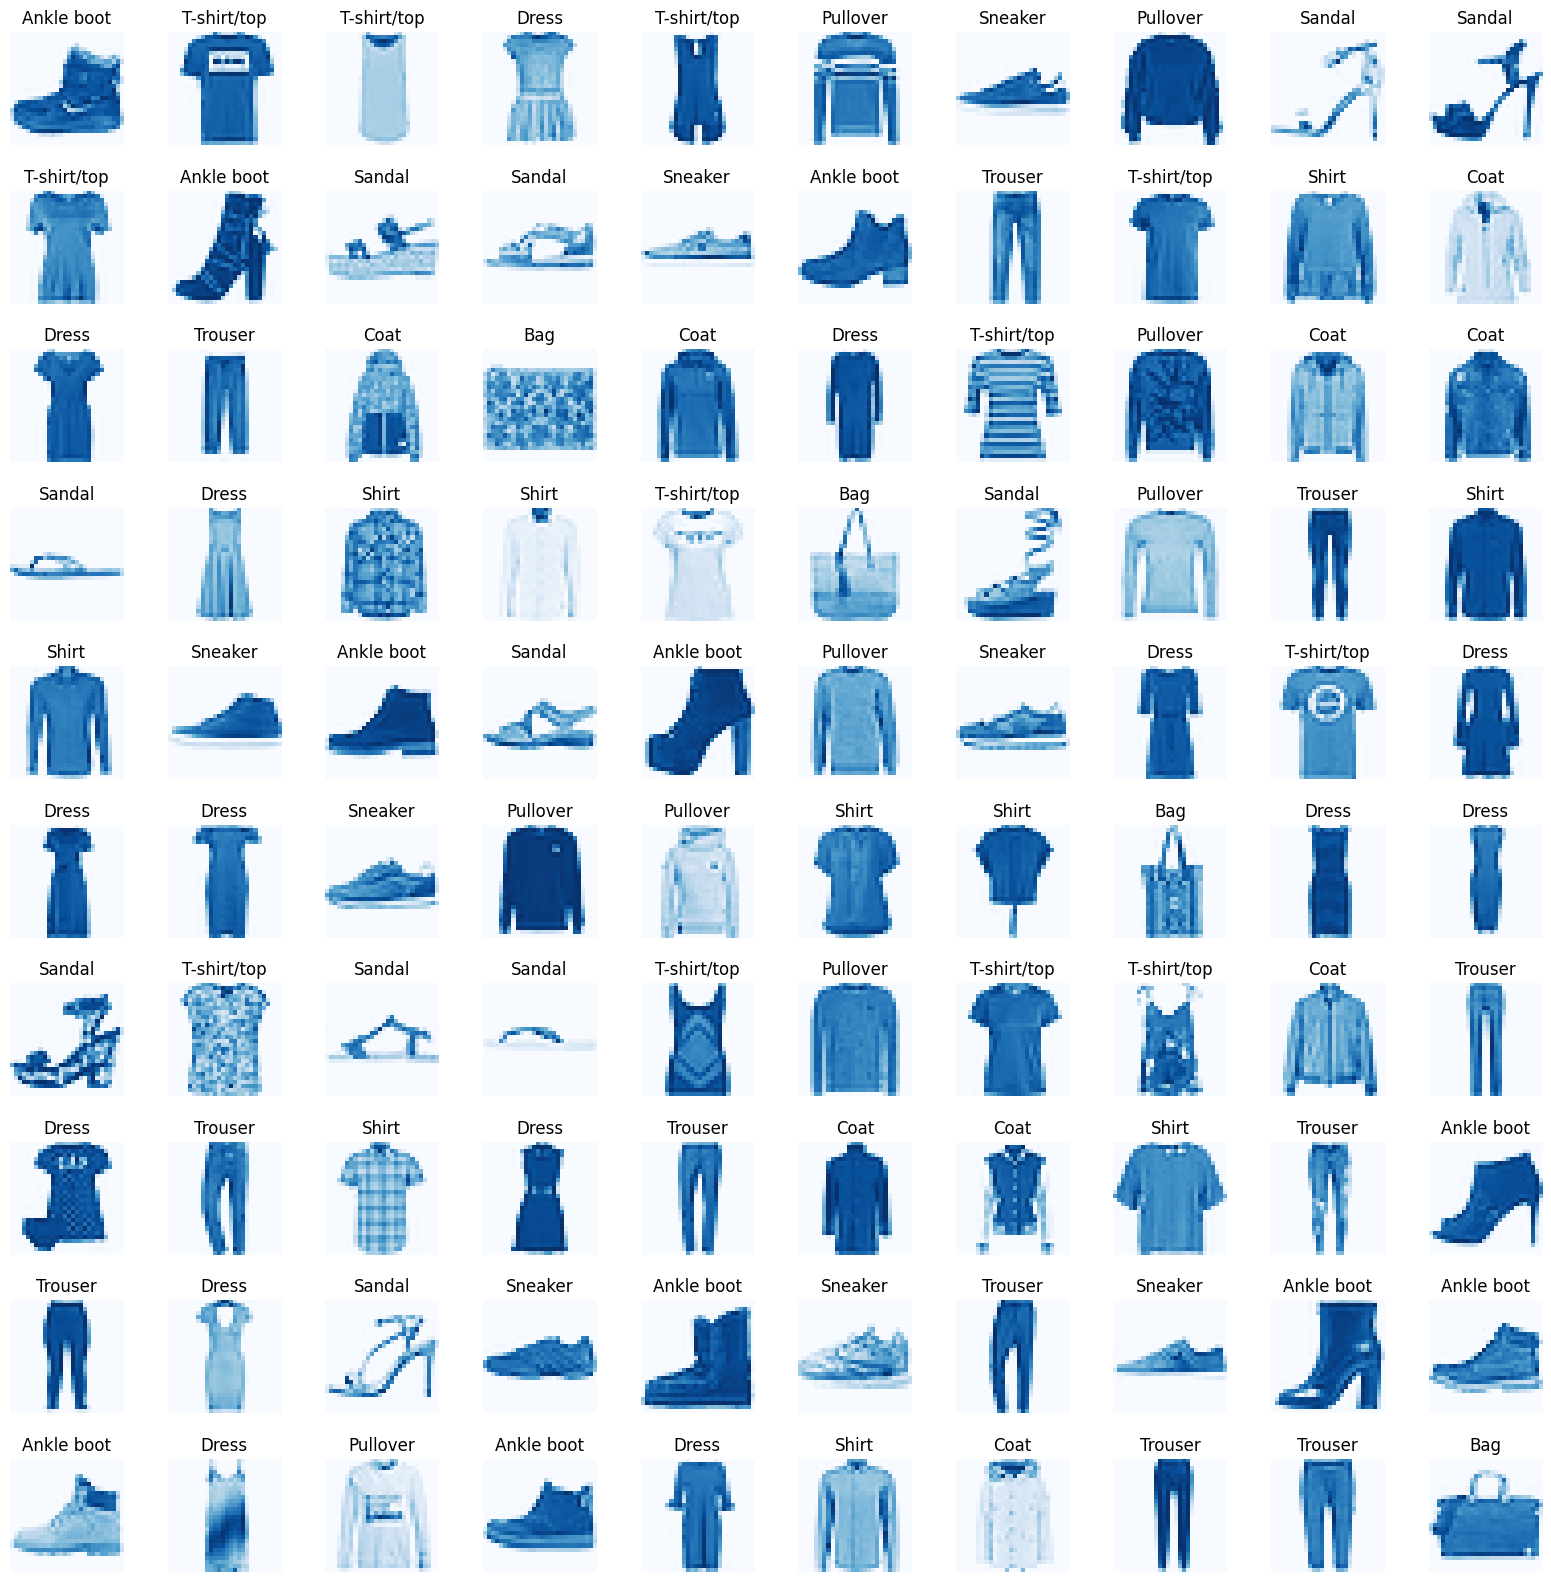

In [4]:
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(100):

    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i],cmap='Blues')
    plt.title(labels[int(y_train[i])],fontsize=12)
    plt.axis('off')

plt.show()

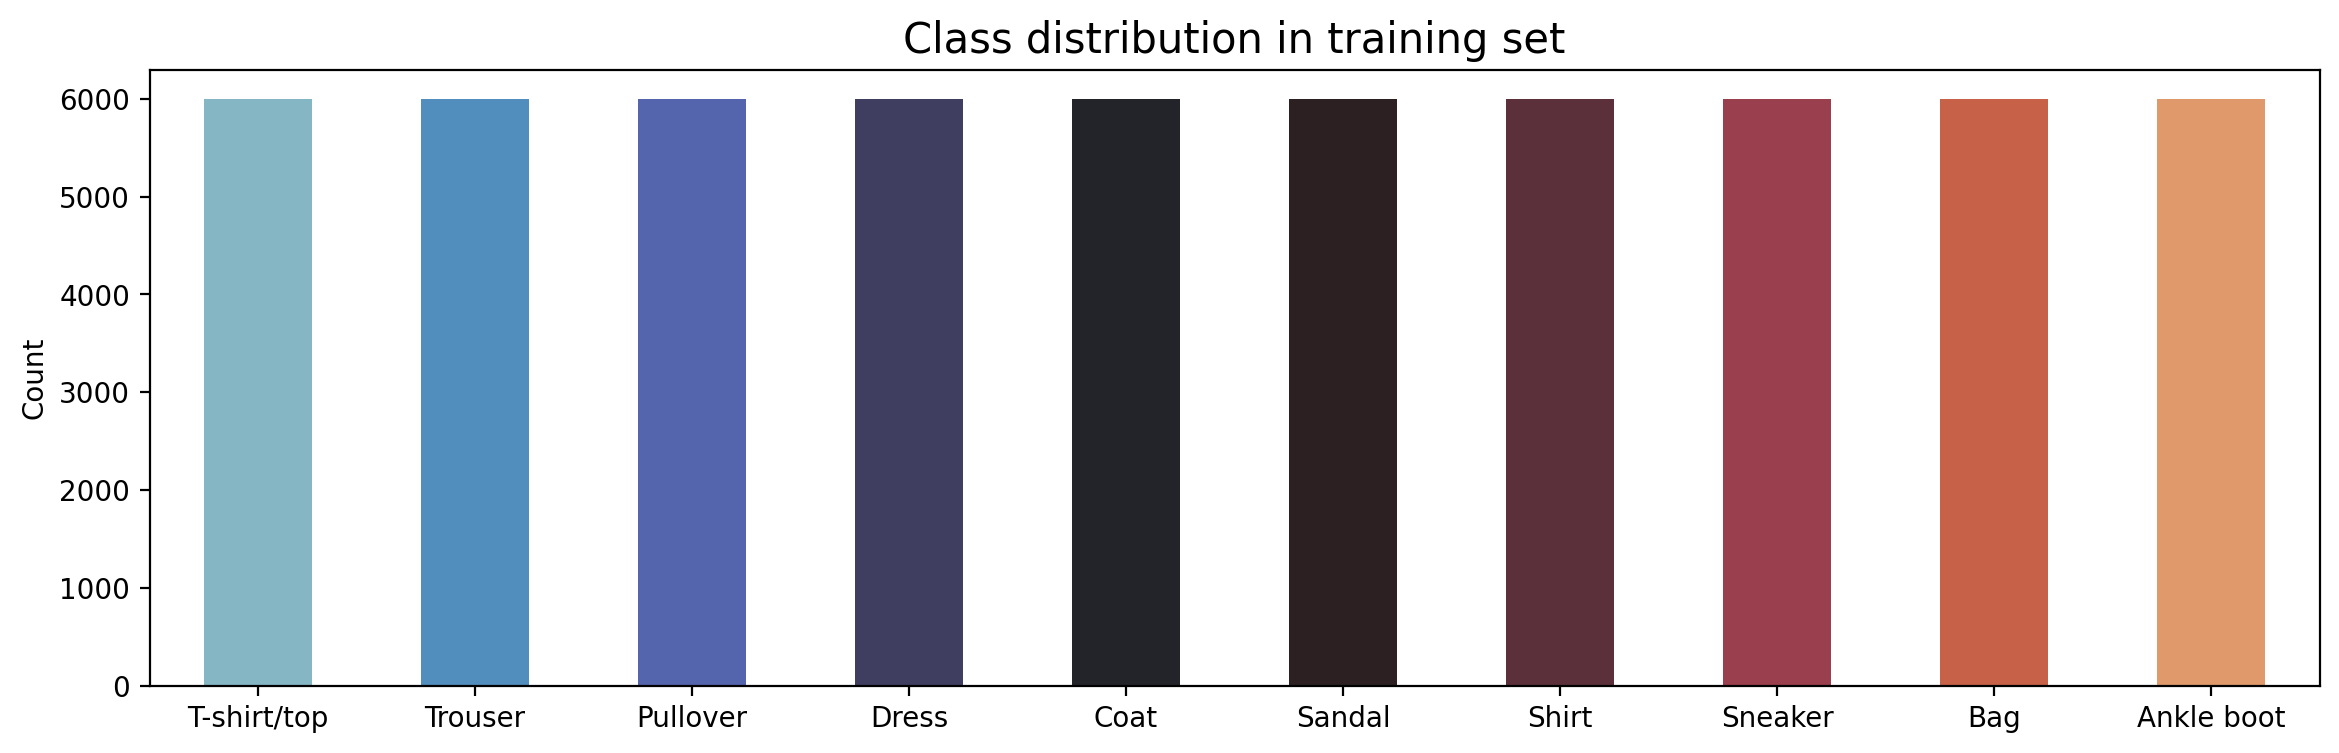

In [5]:
label,count = np.unique(y_train,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in training set',fontsize=15)
plt.show()

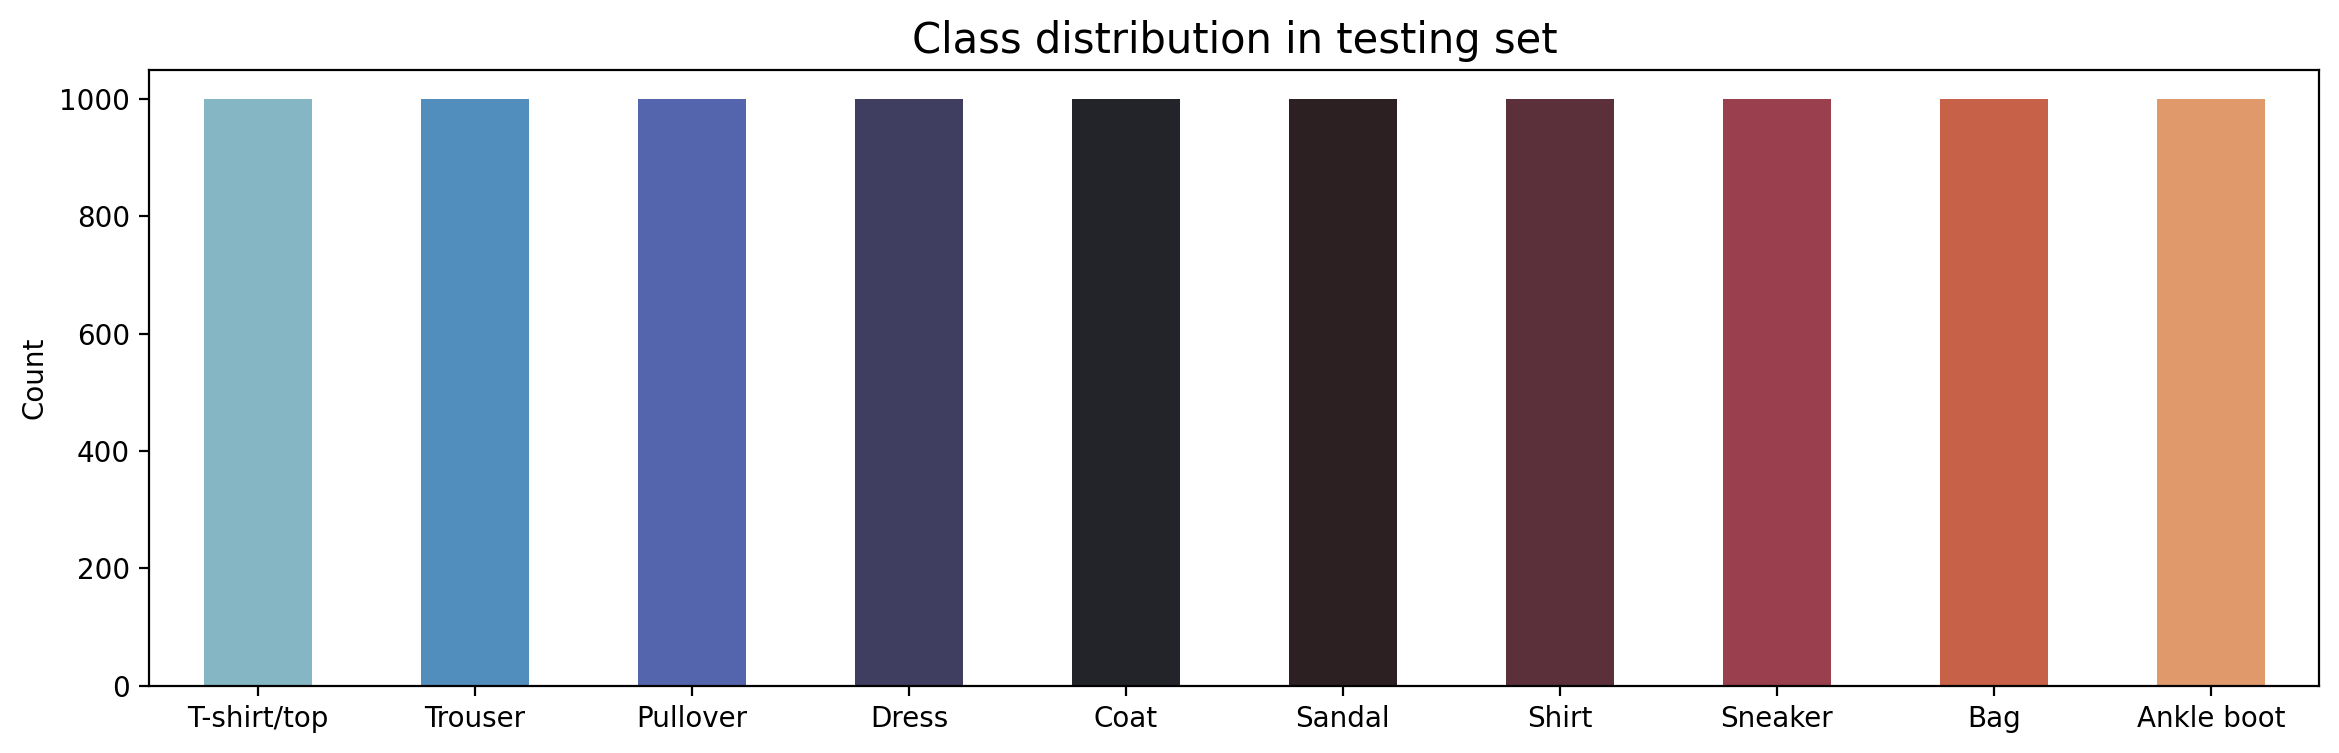

In [6]:
# count for Testing dataset
label,count = np.unique(y_test,return_counts=True)
uni = pd.DataFrame(data=count,index=labels,columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.5).set_title('Class distribution in testing set',fontsize=15)
plt.show()

In [7]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [8]:
# Expand dimensions for Conv2D input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [9]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [30]:
# Build the CNN model
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))  # Optional dropout layer for regularization
model1.add(Dense(10, activation='softmax'))


In [31]:
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [42]:
# Train the model
history = model1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
938/938 [==============================] - 57s 59ms/step - loss: 0.6067 - accuracy: 0.7784 - val_loss: 0.3968 - val_accuracy: 0.8618
Epoch 2/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3765 - accuracy: 0.8669 - val_loss: 0.3290 - val_accuracy: 0.8800
Epoch 3/10
938/938 [==============================] - 57s 61ms/step - loss: 0.3216 - accuracy: 0.8841 - val_loss: 0.3032 - val_accuracy: 0.8899
Epoch 4/10
938/938 [==============================] - 54s 57ms/step - loss: 0.2883 - accuracy: 0.8963 - val_loss: 0.2843 - val_accuracy: 0.8960
Epoch 5/10
938/938 [==============================] - 56s 59ms/step - loss: 0.2677 - accuracy: 0.9035 - val_loss: 0.2724 - val_accuracy: 0.9008
Epoch 6/10
938/938 [==============================] - 55s 59ms/step - loss: 0.2458 - accuracy: 0.9107 - val_loss: 0.2658 - val_accuracy: 0.9071
Epoch 7/10
938/938 [==============================] - 54s 57ms/step - loss: 0.2287 - accuracy: 0.9162 - val_loss: 0.2642 - val_accuracy:

In [13]:
# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 3s 9ms/step - loss: 0.2588 - accuracy: 0.9098
Test Loss: 0.2588, Test Accuracy: 0.9098


In [14]:
print('The accuracy of the Base Model1 is:',accuracy*100)
print('The Loss of the Base Model1 is:',loss)

The accuracy of the Base Model is: 90.97999930381775
The Loss of the Base Model is: 0.25876614451408386


In [28]:
# Plot training history
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

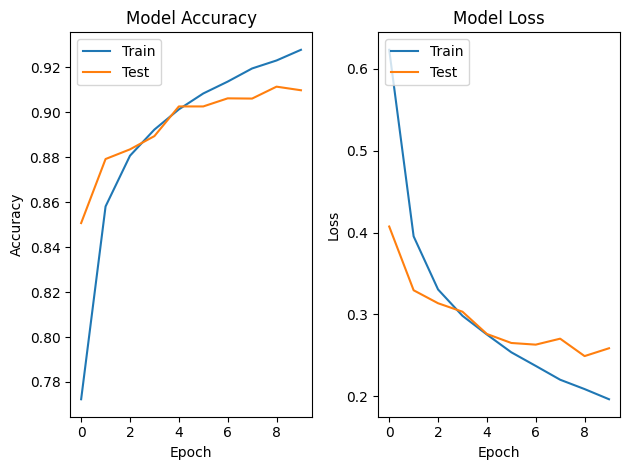

In [15]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')


plt.tight_layout()
plt.show()

In [38]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

In [39]:
# Build the CNN model
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))


In [40]:
import tensorflow as tf

# Compile the model with a more sophisticated optimizer (e.g., Adam) and a learning rate scheduler
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)


In [20]:
# Train the model with data augmentation
history = model2.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler],
    steps_per_epoch=len(X_train) // 64
)


Epoch 1/30
937/937 [==============================] - 81s 85ms/step - loss: 0.8762 - accuracy: 0.6722 - val_loss: 0.5644 - val_accuracy: 0.7779 - lr: 0.0010
Epoch 2/30
937/937 [==============================] - 74s 78ms/step - loss: 0.6268 - accuracy: 0.7644 - val_loss: 0.4746 - val_accuracy: 0.8220 - lr: 0.0010
Epoch 3/30
937/937 [==============================] - 74s 79ms/step - loss: 0.5490 - accuracy: 0.7936 - val_loss: 0.4425 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 4/30
937/937 [==============================] - 75s 80ms/step - loss: 0.5100 - accuracy: 0.8102 - val_loss: 0.4226 - val_accuracy: 0.8439 - lr: 0.0010
Epoch 5/30
937/937 [==============================] - 74s 79ms/step - loss: 0.4748 - accuracy: 0.8254 - val_loss: 0.3863 - val_accuracy: 0.8587 - lr: 0.0010
Epoch 6/30
937/937 [==============================] - 75s 80ms/step - loss: 0.4471 - accuracy: 0.8348 - val_loss: 0.3507 - val_accuracy: 0.8709 - lr: 0.0010
Epoch 7/30
937/937 [==============================] - 74s 

In [22]:
# Evaluate the model on the test set
loss1, accuracy1 = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss1:.4f}, Test Accuracy: {accuracy1:.4f}')

313/313 [==============================] - 6s 19ms/step - loss: 0.2635 - accuracy: 0.9057
Test Loss: 0.2635, Test Accuracy: 0.9057


In [23]:
print('The accuracy of the Base Model is:',accuracy1*100)
print('The Loss of the Base Model is:',loss1)

The accuracy of the Base Model is: 90.57000279426575
The Loss of the Base Model is: 0.2635481655597687


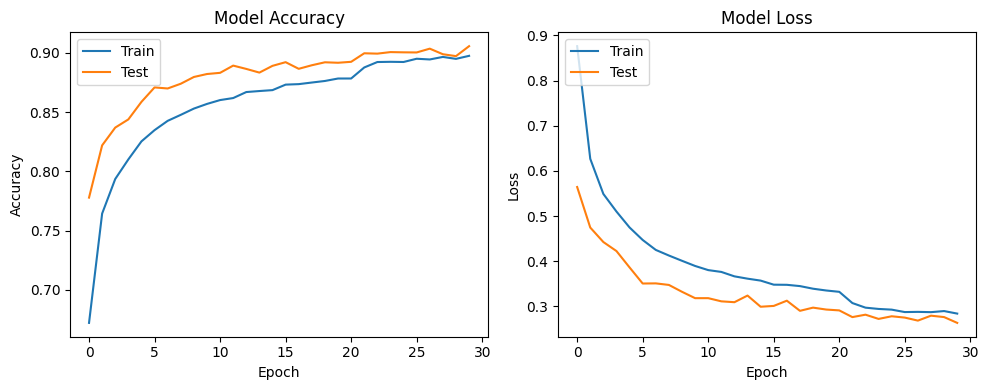

In [24]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [25]:
# Resize images to meet the minimum input size required by MobileNetV2 (32x32)
X_train_resized = np.array([np.resize(image, (32, 32, 1)) for image in X_train])
X_test_resized = np.array([np.resize(image, (32, 32, 1)) for image in X_test])

# Repeat the single channel to create three channels (RGB-like)
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

In [26]:
# Load the MobileNetV2 model without the top (fully connected) layers
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a sequential model and add the MobileNetV2 base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1, 1, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_4 (Dense)             (None, 128)               163968    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2423242 (9.24 MB)
Trainable params: 2389130 (9.11 MB)
Non-trainable params: 34112 (133.25 KB)
_______________

In [27]:
# Train the model
history = model.fit(X_train_resized, y_train, epochs=10, validation_data=(X_test_resized, y_test), batch_size=64)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')
print('The accuracy of the MobileNetV2 Model is:', accuracy * 100)
print('The Loss of the MobileNetV2 Model is:', loss)

# Plot training history
plt.figure(figsize=(10, 4))

Epoch 1/10
938/938 [==============================] - 334s 338ms/step - loss: 0.6539 - accuracy: 0.7766 - val_loss: 9.3590 - val_accuracy: 0.2523
Epoch 2/10
938/938 [==============================] - 317s 338ms/step - loss: 0.4437 - accuracy: 0.8454 - val_loss: 3.2281 - val_accuracy: 0.4694
Epoch 3/10
938/938 [==============================] - 309s 329ms/step - loss: 0.3878 - accuracy: 0.8659 - val_loss: 0.6440 - val_accuracy: 0.8029
Epoch 4/10
938/938 [==============================] - 304s 324ms/step - loss: 0.3640 - accuracy: 0.8731 - val_loss: 1.0448 - val_accuracy: 0.7523
Epoch 5/10
938/938 [==============================] - 305s 326ms/step - loss: 0.3447 - accuracy: 0.8787 - val_loss: 0.6078 - val_accuracy: 0.8207
Epoch 6/10
938/938 [==============================] - 301s 321ms/step - loss: 0.3217 - accuracy: 0.8855 - val_loss: 0.8237 - val_accuracy: 0.7953
Epoch 7/10
938/938 [==============================] - 304s 324ms/step - loss: 0.3120 - accuracy: 0.8885 - val_loss: 0.8059 -

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

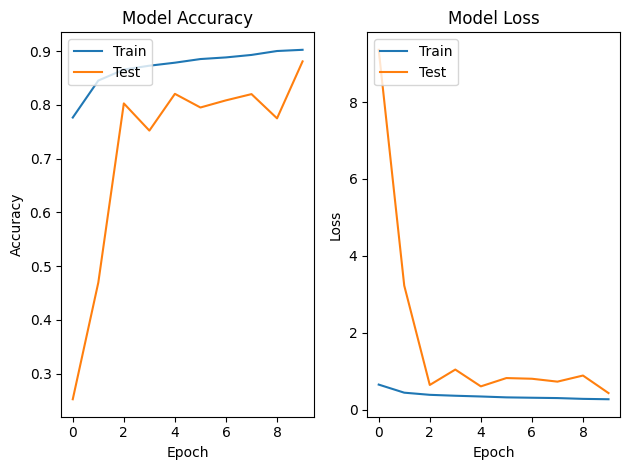

In [28]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [32]:
y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

313/313 [==============================] - 3s 9ms/step


In [45]:
from sklearn.metrics import classification_report

# Get predictions on the test set
y_pred = model1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Print the classification report
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names = labels))


313/313 [==============================] - 5s 16ms/step
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.85      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.86      0.88      0.87      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.87      0.85      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.73      0.75      0.74      1000
     Sneaker       0.96      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



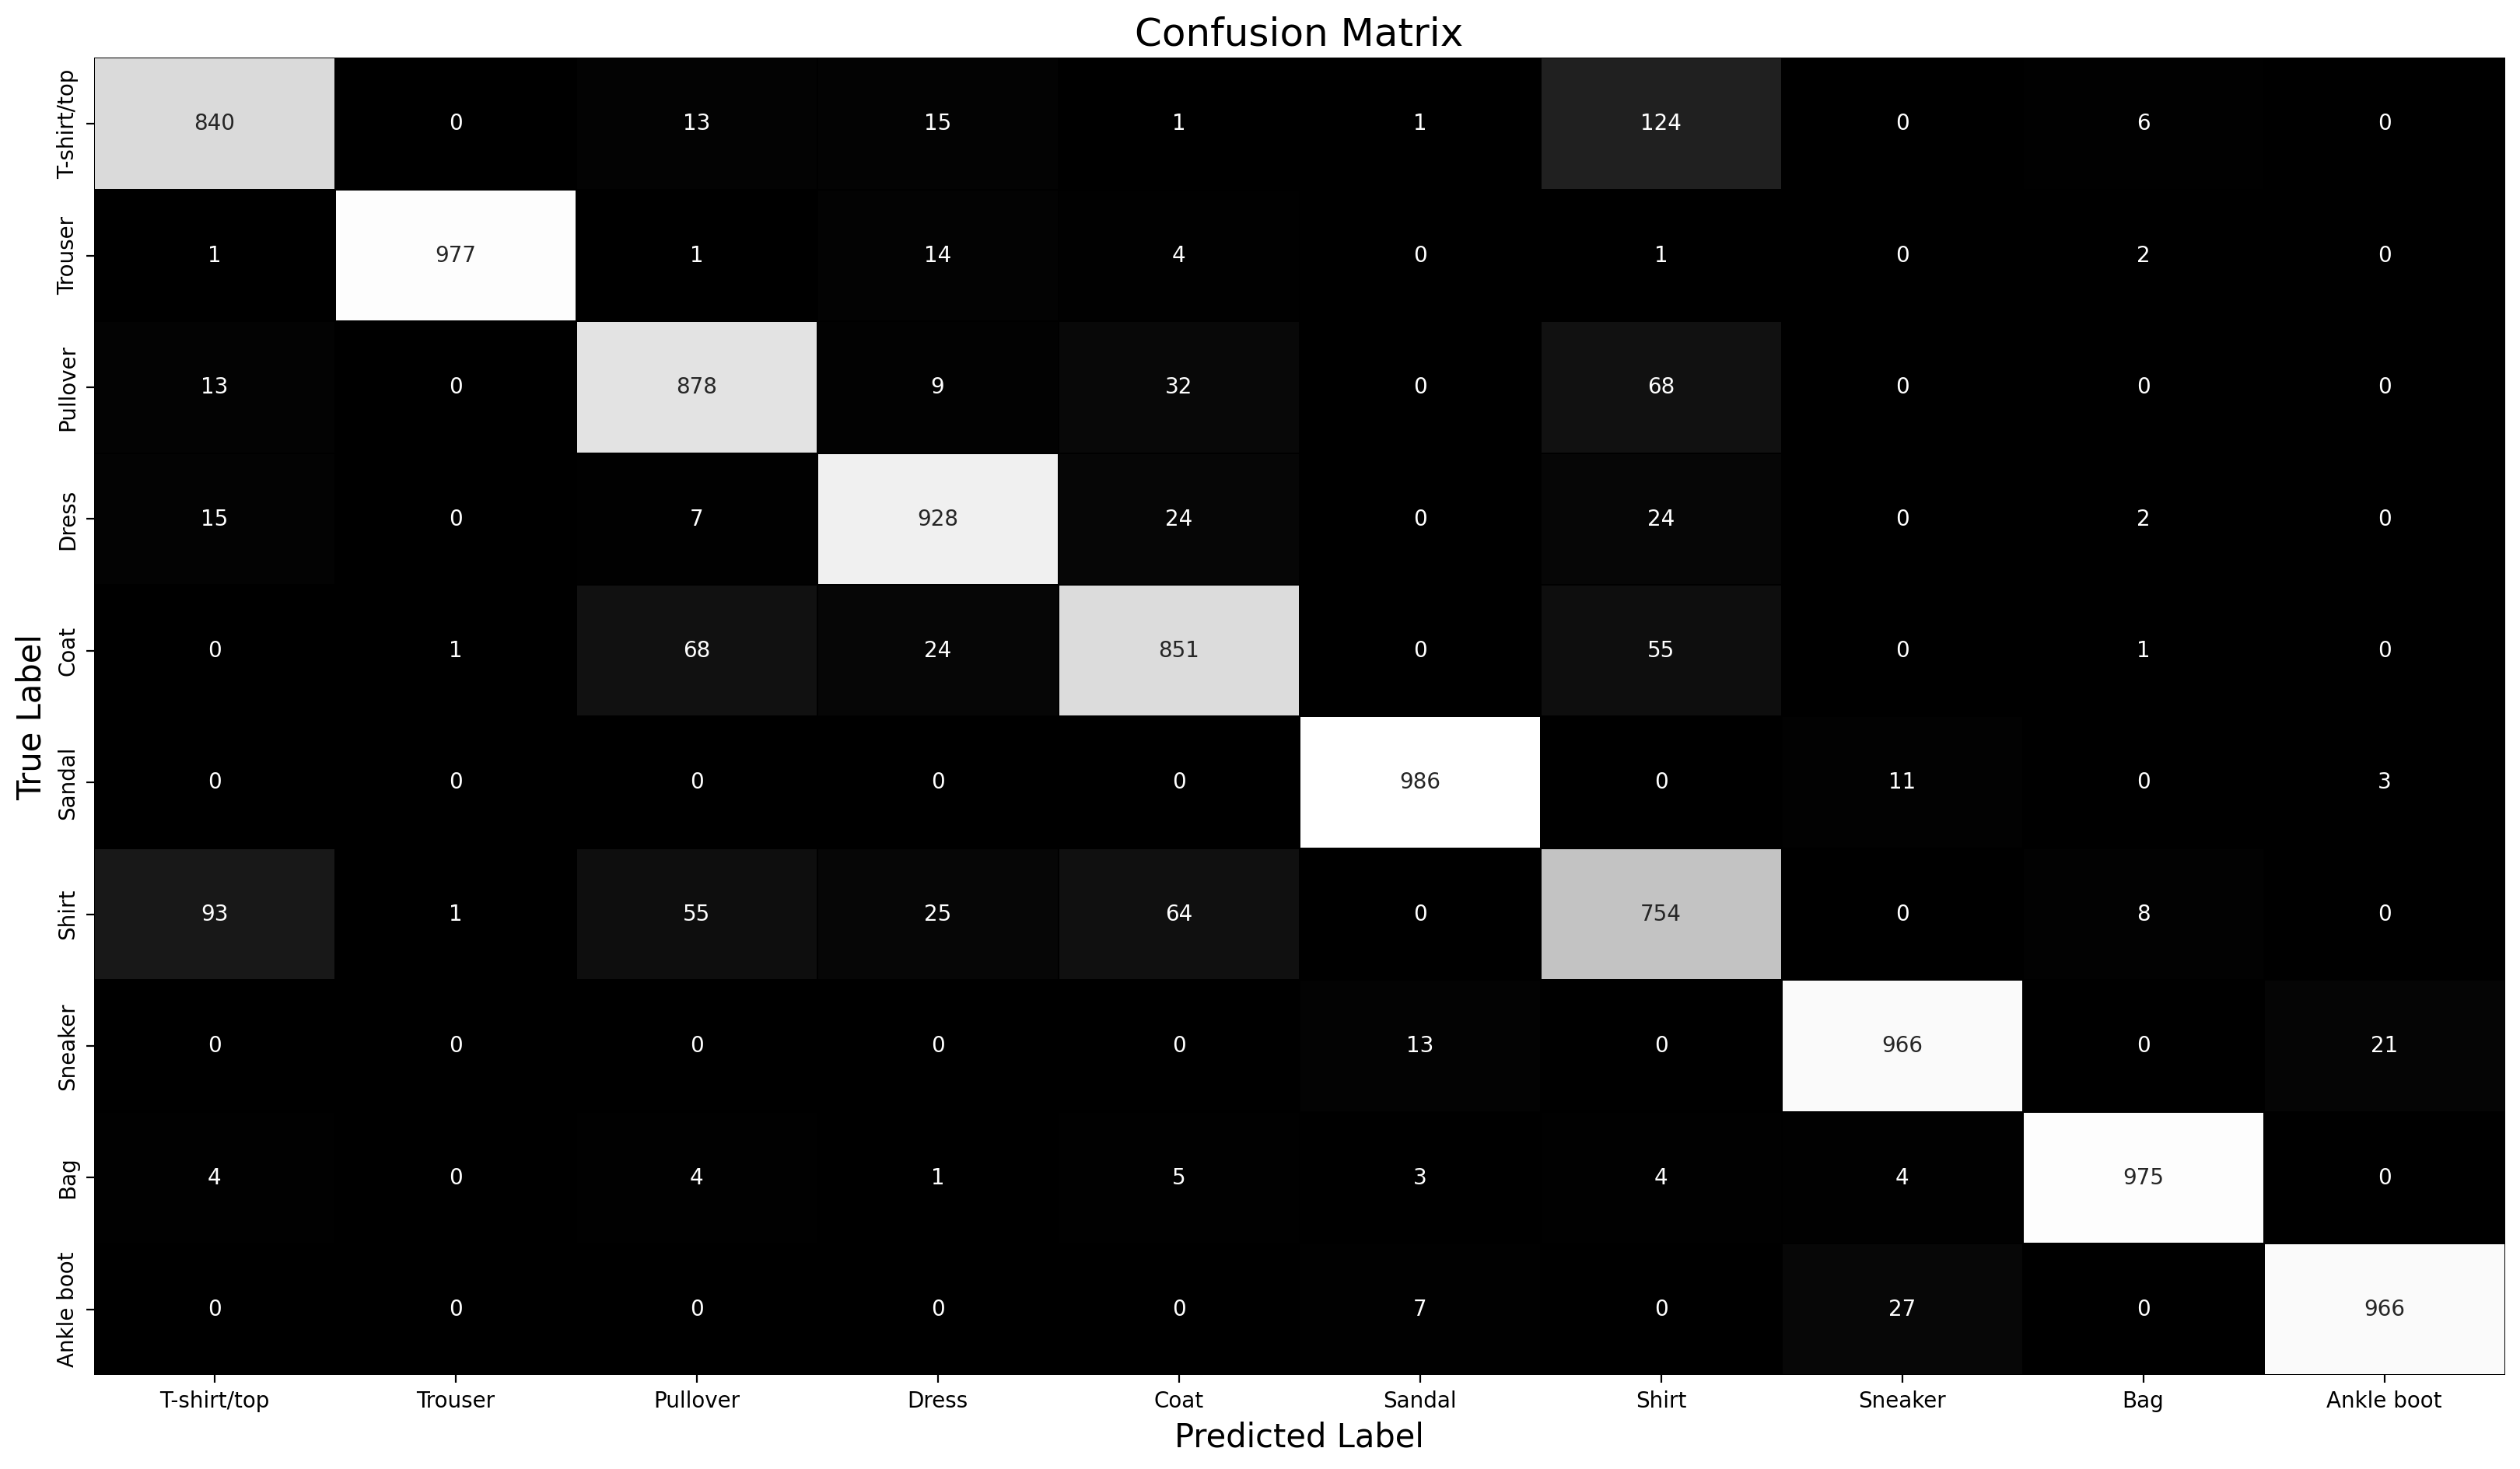

In [46]:
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

f,ax = plt.subplots(figsize = (20,11),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False,xticklabels=labels,yticklabels=labels)
plt.xlabel("Predicted Label",fontsize=15)
plt.ylabel("True Label",fontsize=15)
plt.title("Confusion Matrix",fontsize=18)
plt.show()

In [47]:
p = y_pred_classes[:10000]
y = y_true_classes[:10000]
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 9121
Incorrect predicted classes: 879


In [48]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(20,10),dpi=200)

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[y_true_classes[indx]],labels[y_pred_classes[indx]]))
    plt.show()
    plt.tight_layout()

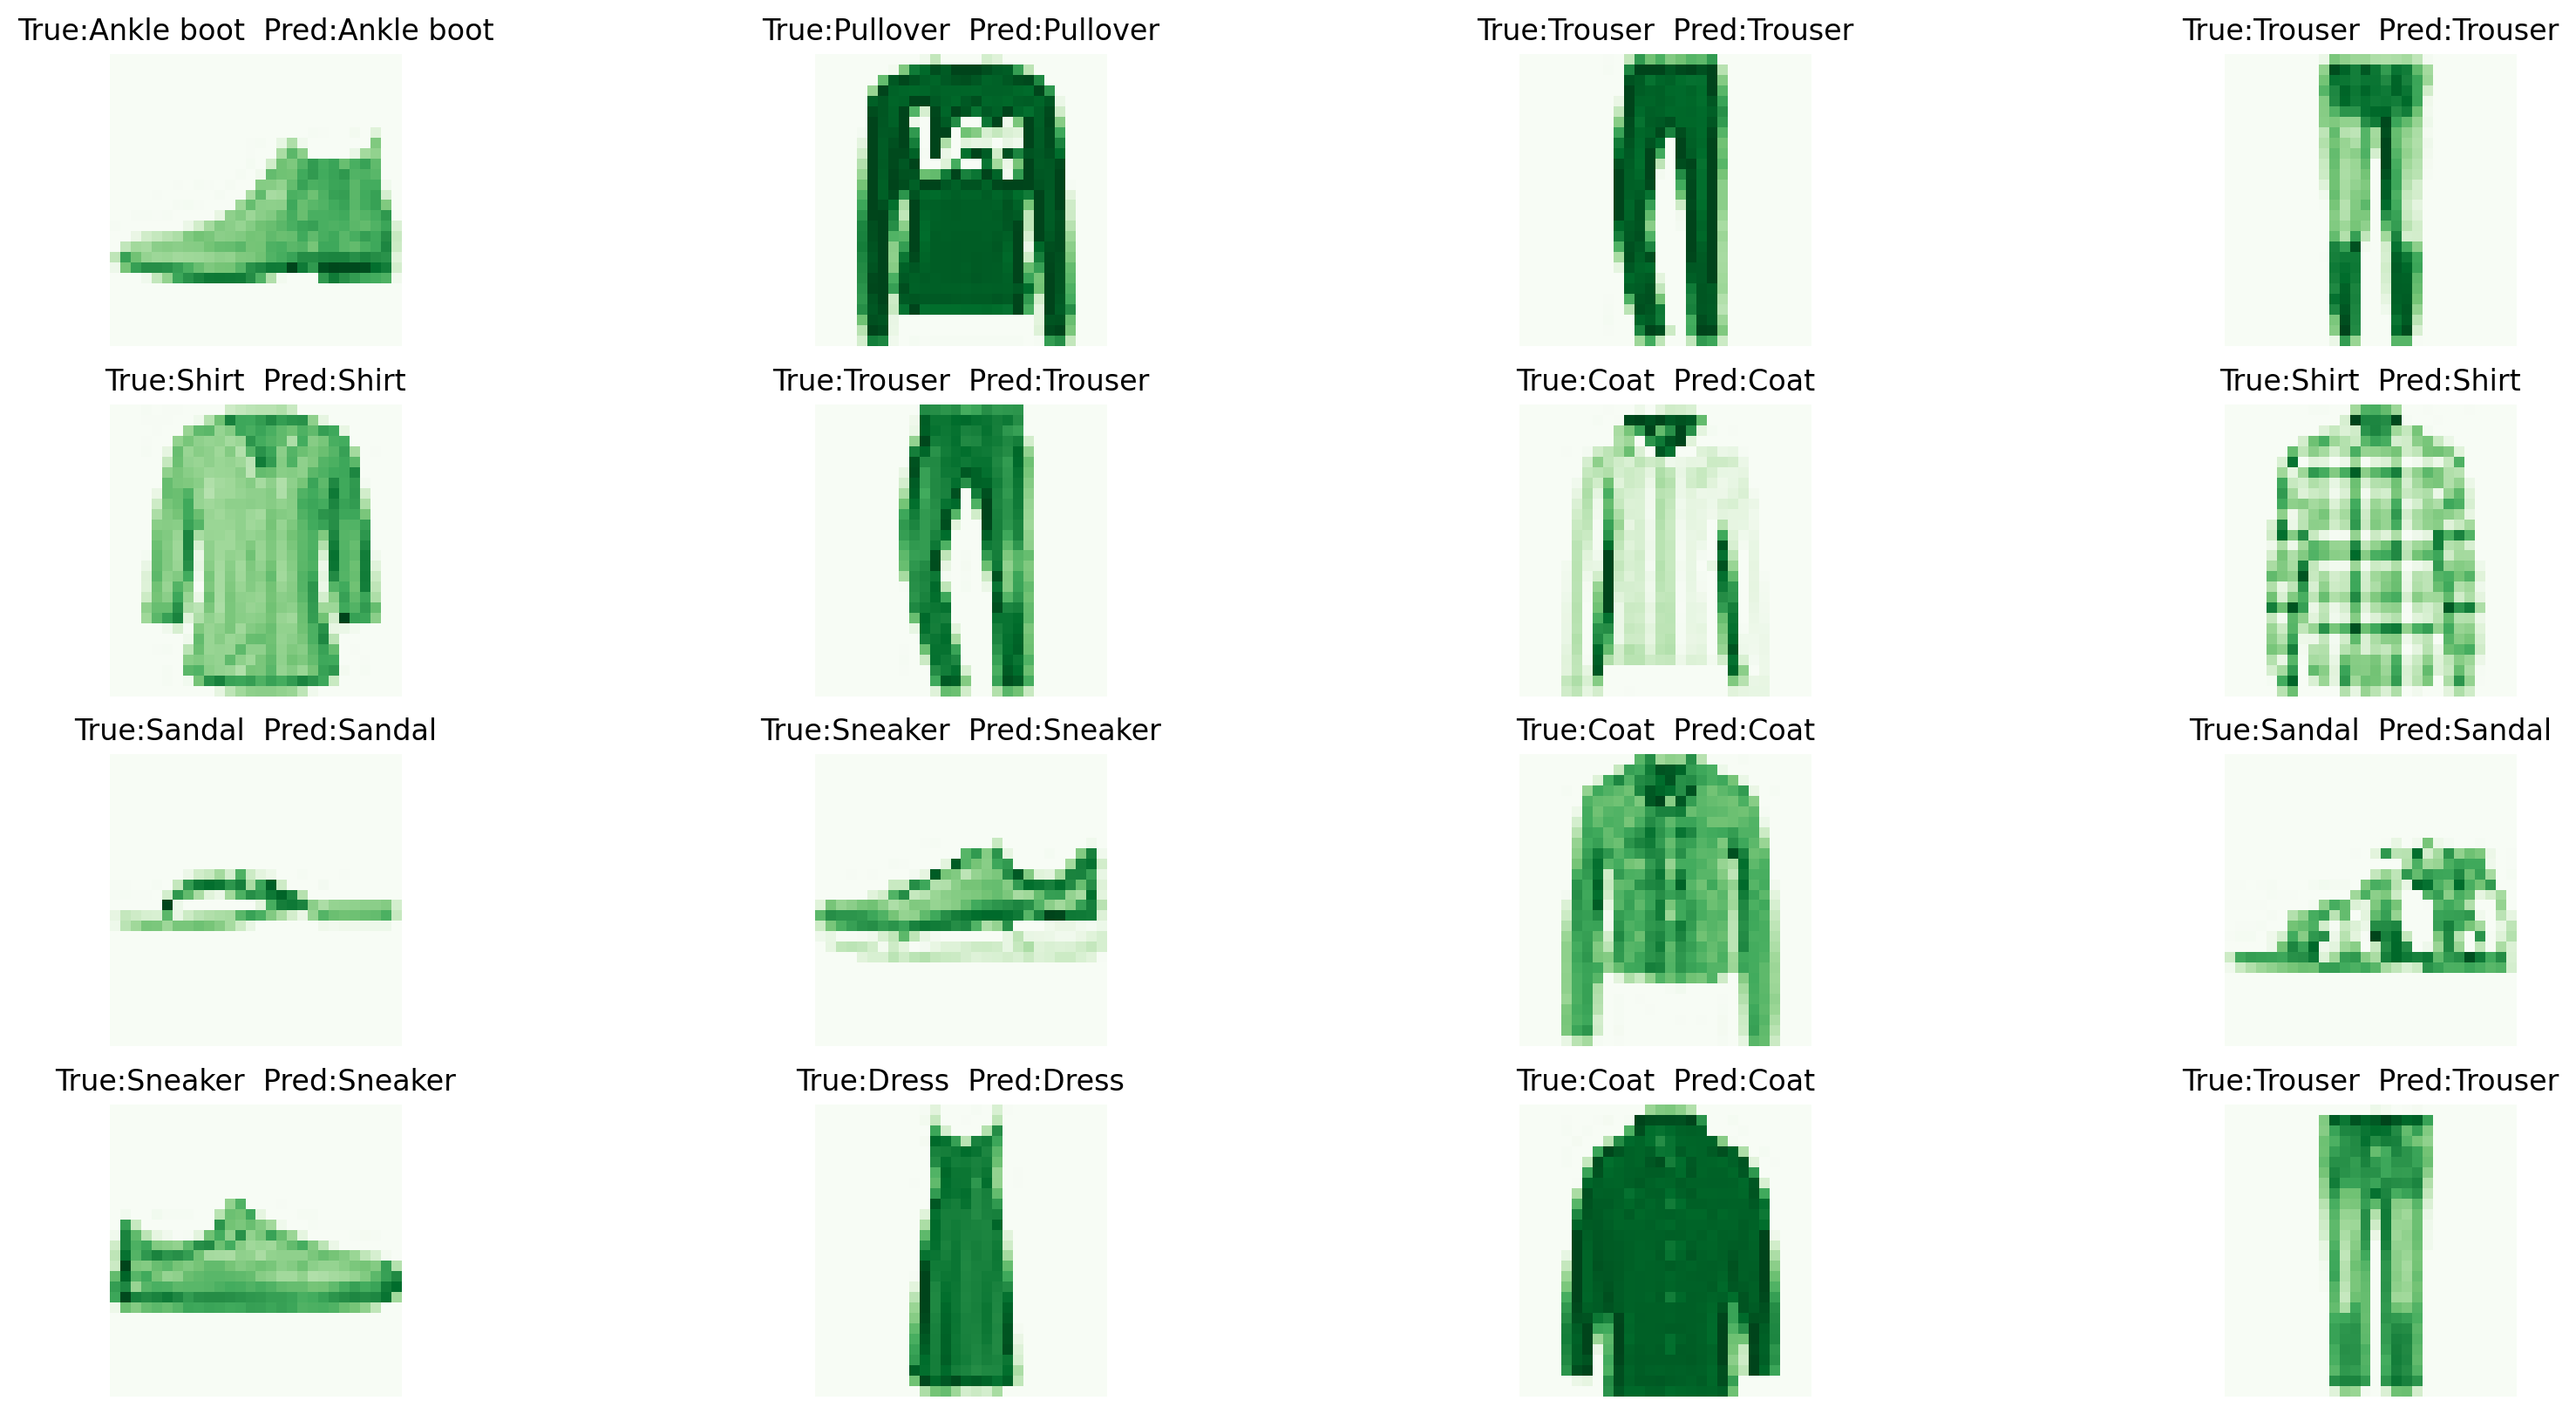

<Figure size 640x480 with 0 Axes>

In [49]:
plot_images(correct, "Greens")

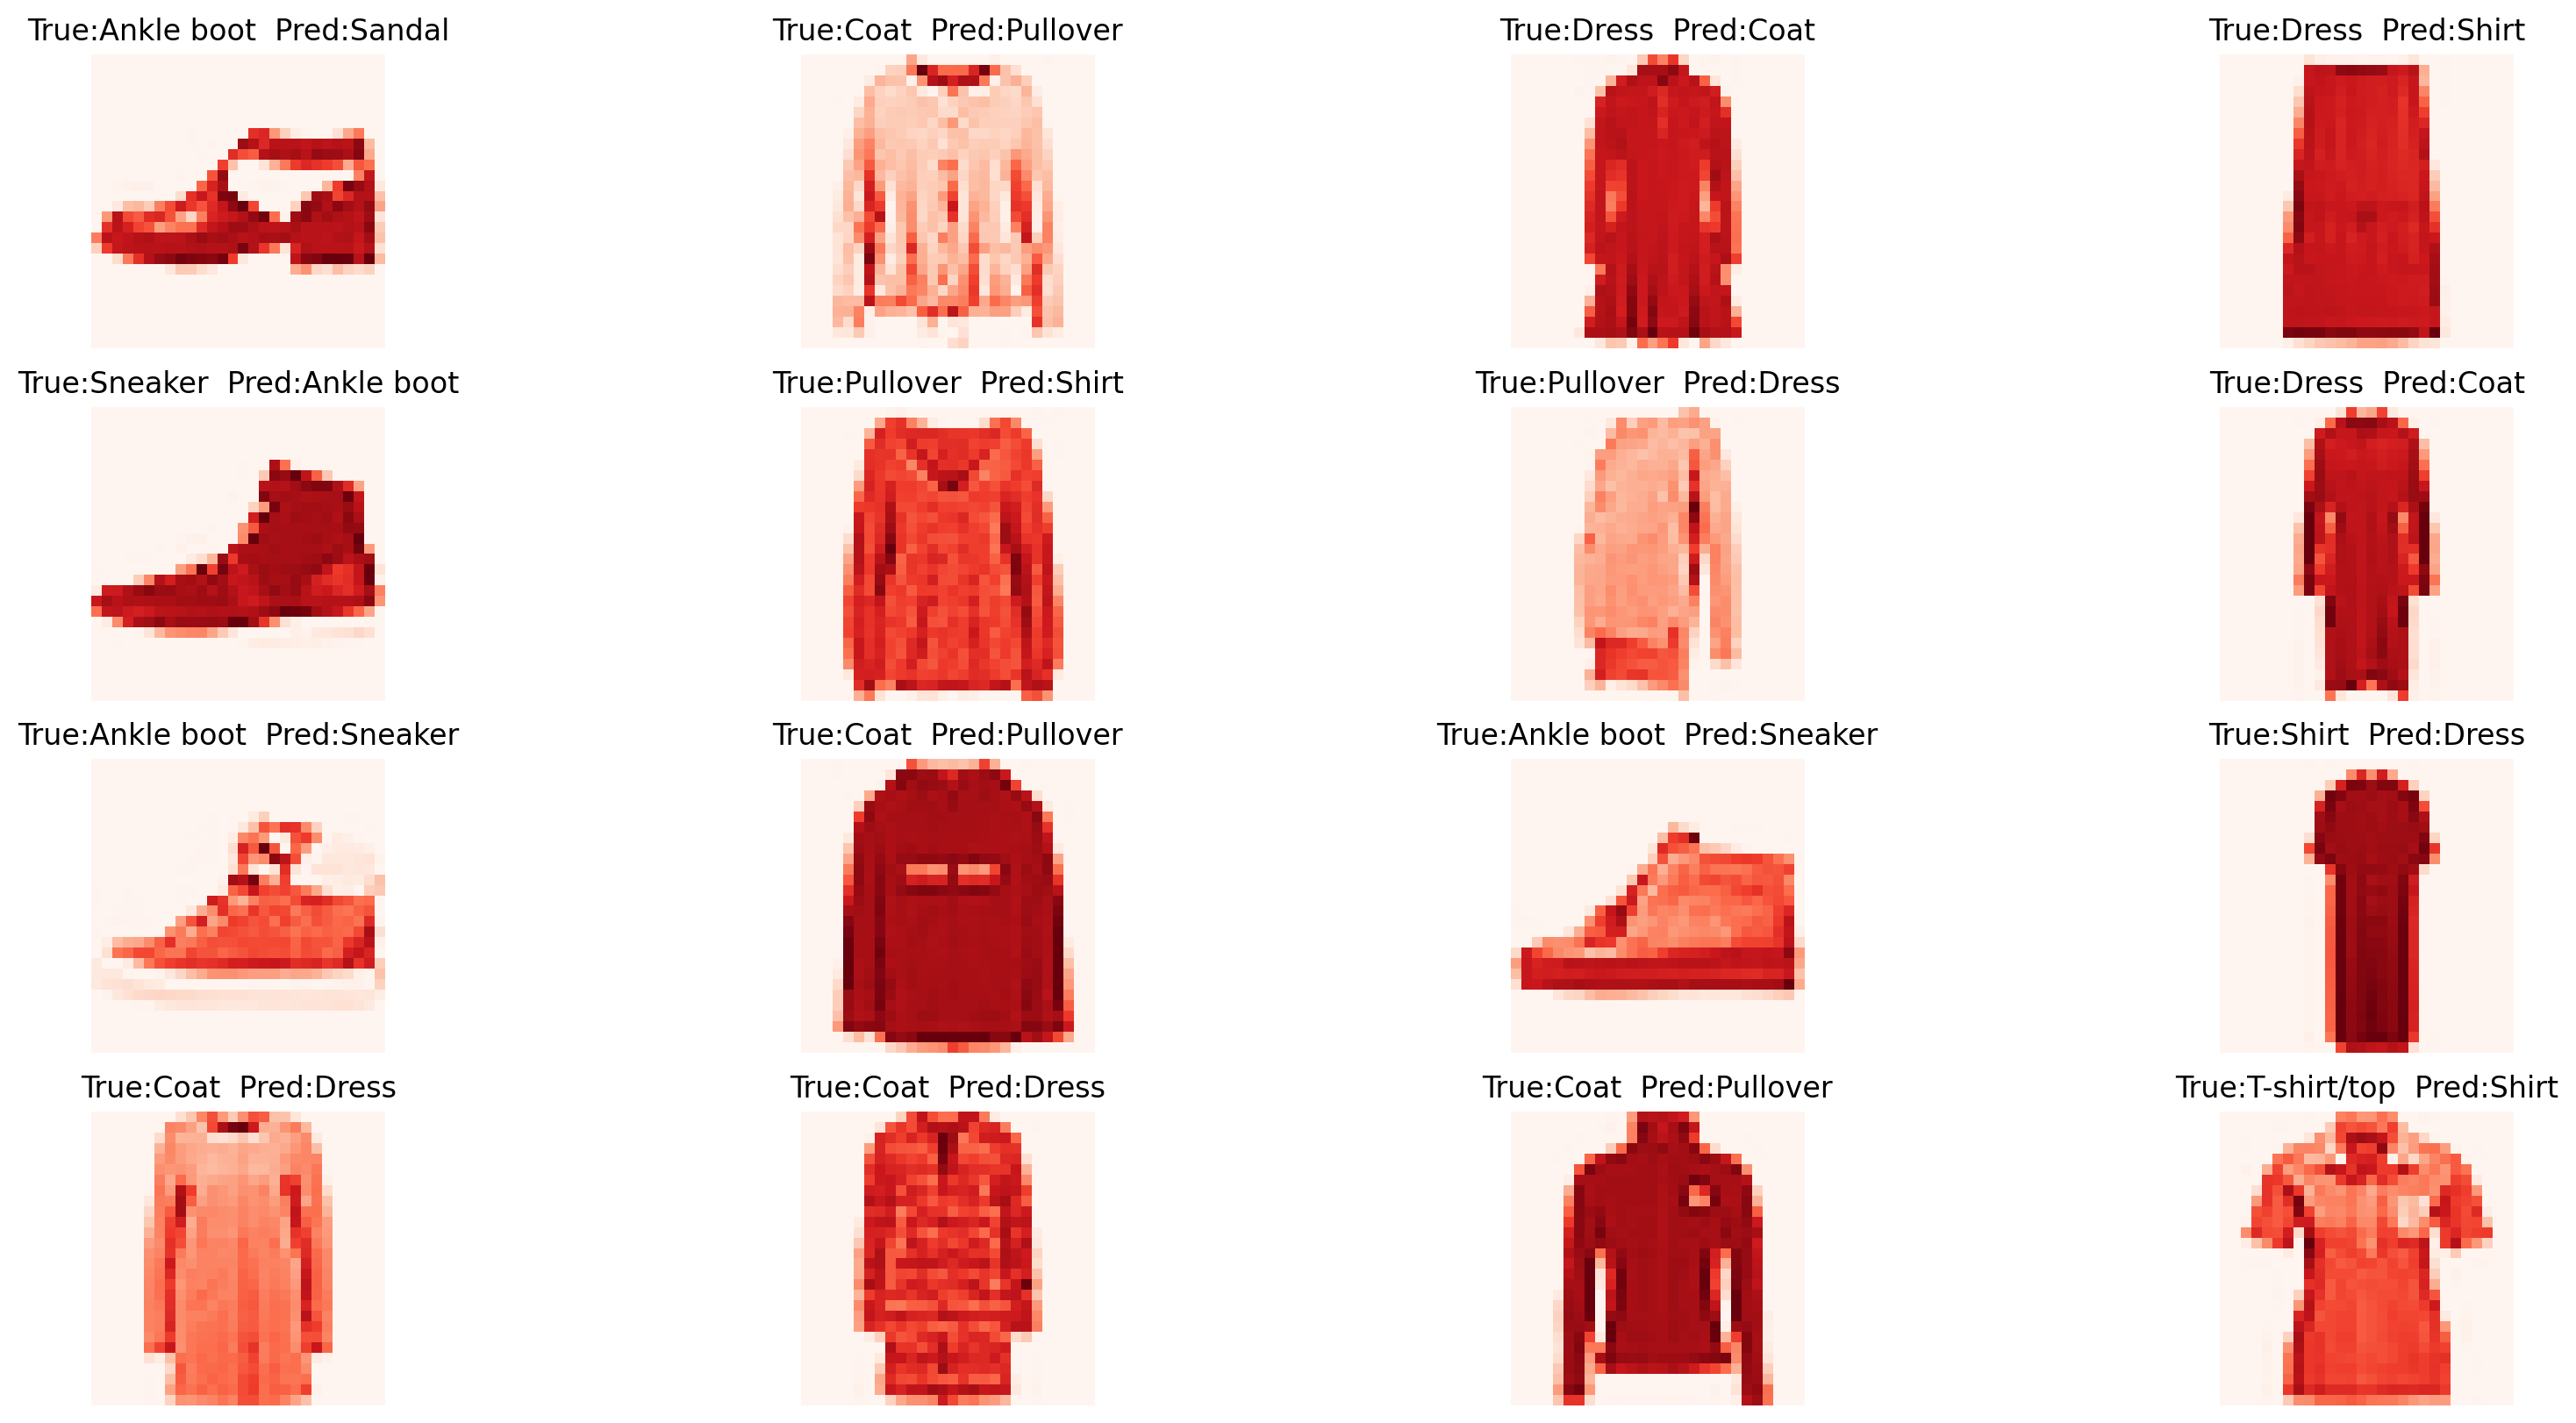

<Figure size 640x480 with 0 Axes>

In [50]:
# incorrect labeled images
plot_images(incorrect, "Reds")

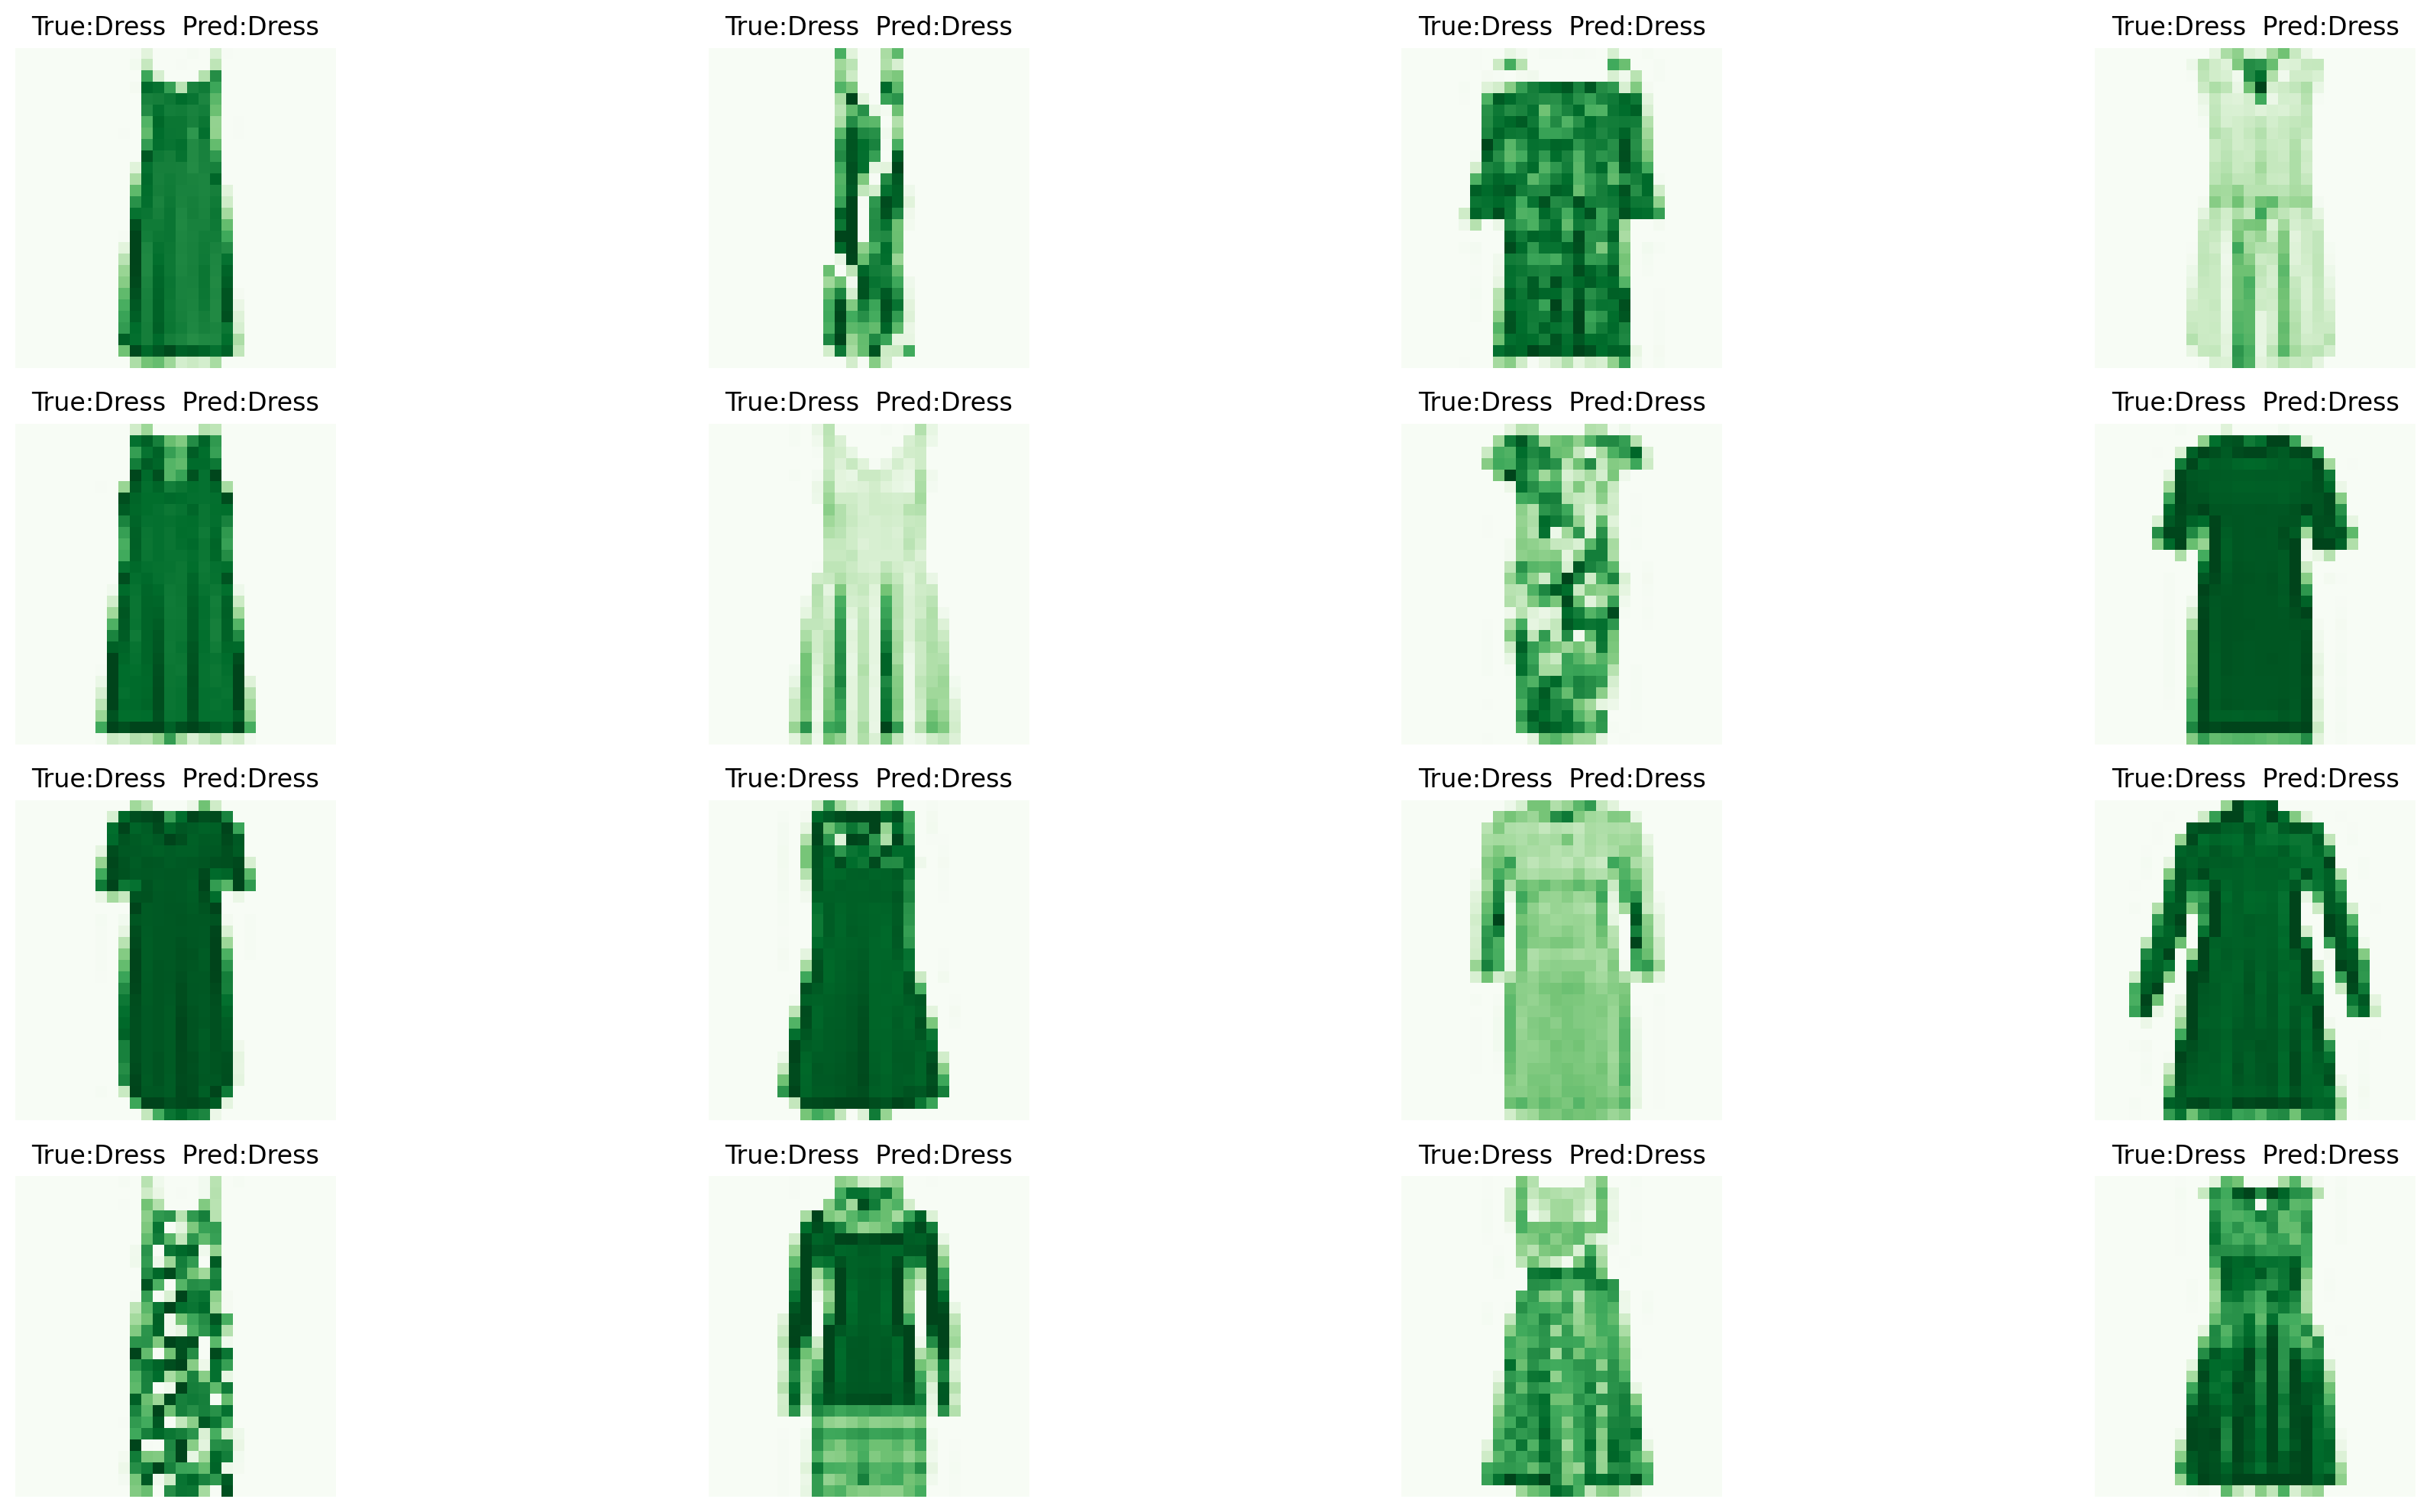

In [51]:
# Get the predictions and true labels

y_pred_classes_labels = np.array([labels[i] for i in y_pred_classes])
y_true_classes_labels = np.array([labels[i] for i in y_true_classes])

def plot_images1(data_index, cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4, 4, figsize=(20, 10), dpi=200)

    for i, indx in enumerate(data_index[:16]):
        ax[i // 4, i % 4].imshow(X_test[indx].reshape(28, 28), cmap=cmap)
        ax[i // 4, i % 4].axis('off')
        ax[i // 4, i % 4].set_title("True:{}  Pred:{}".format(labels[y_true_classes[indx]], labels[y_pred_classes[indx]]))

    plt.tight_layout()
    plt.show()


# Filter incorrect predictions for the "Dress" class
incorrect_dress_indices = np.where((y_true_classes_labels == 'Dress') & (y_true_classes_labels != y_pred_classes_labels))[0]

# Filter correct predictions for the "Dress" class
correct_dress_indices = np.where((y_true_classes_labels == 'Dress') & (y_true_classes_labels == y_pred_classes_labels))[0]

# Use the plot_images function to visualize correct predictions for "Dress"
plot_images1(correct_dress_indices, "Greens")


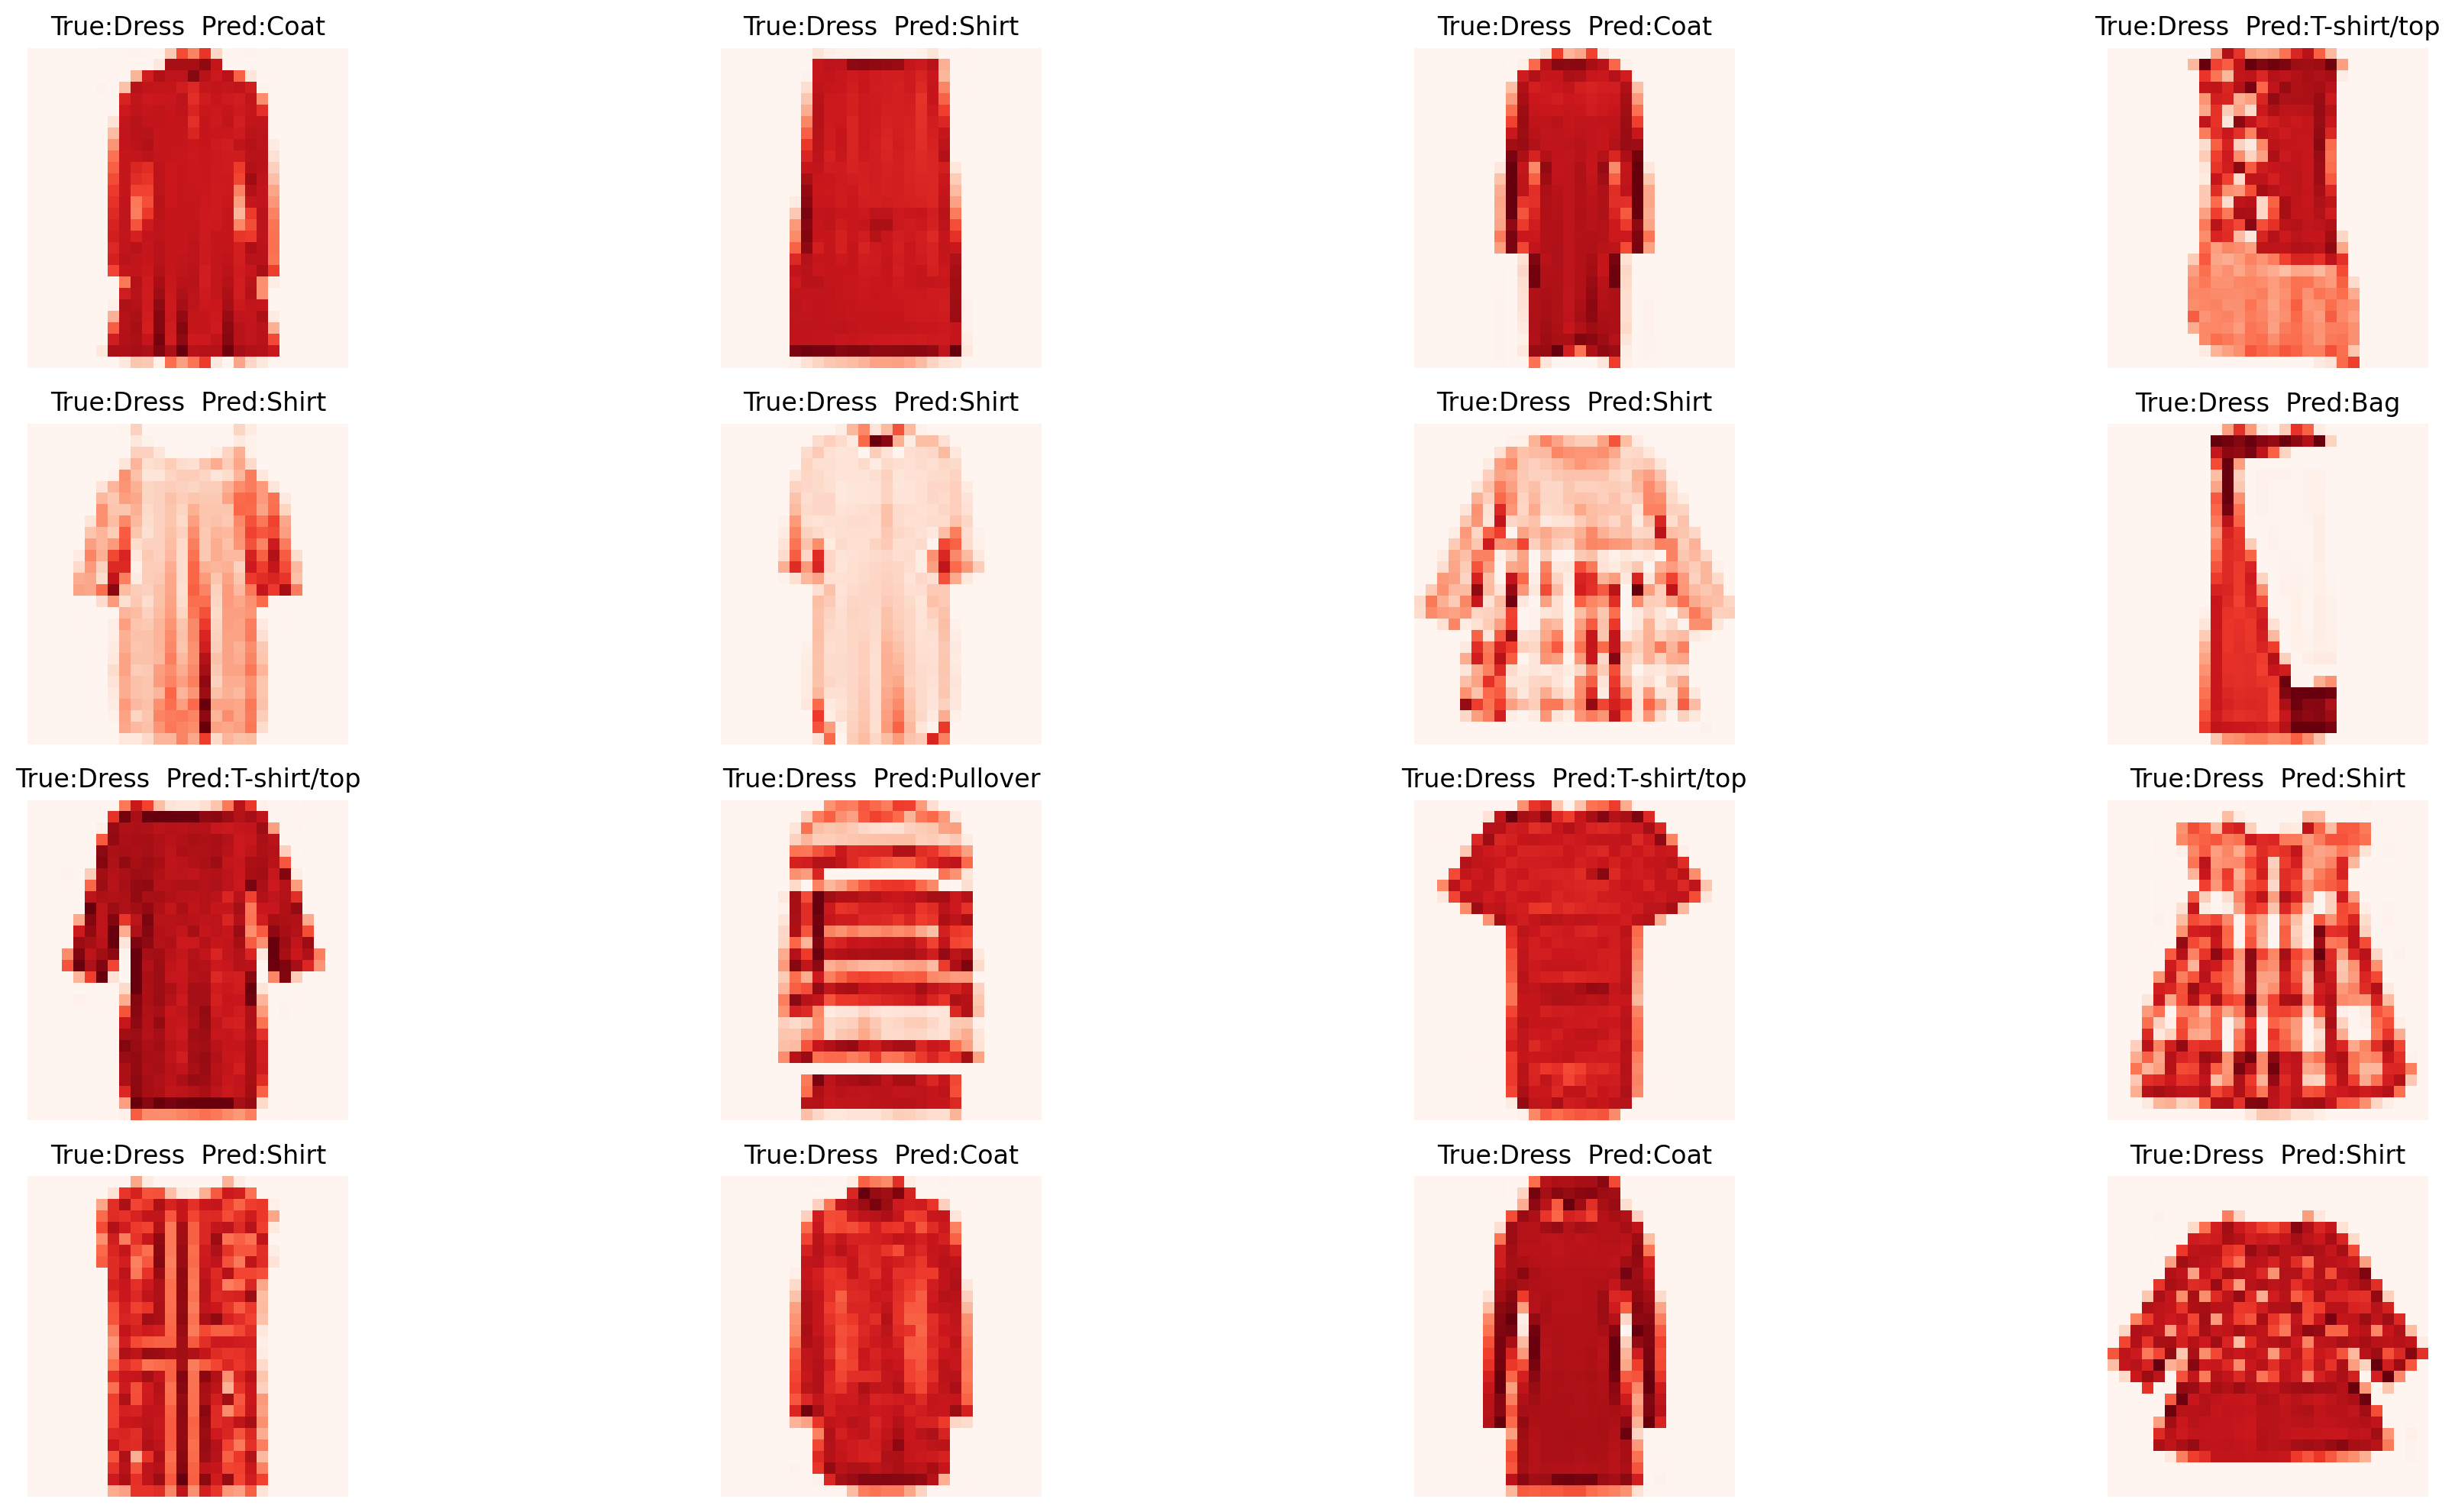

In [52]:
# Use the plot_images function to visualize incorrect predictions for "Dress"
plot_images1(incorrect_dress_indices, "Reds")



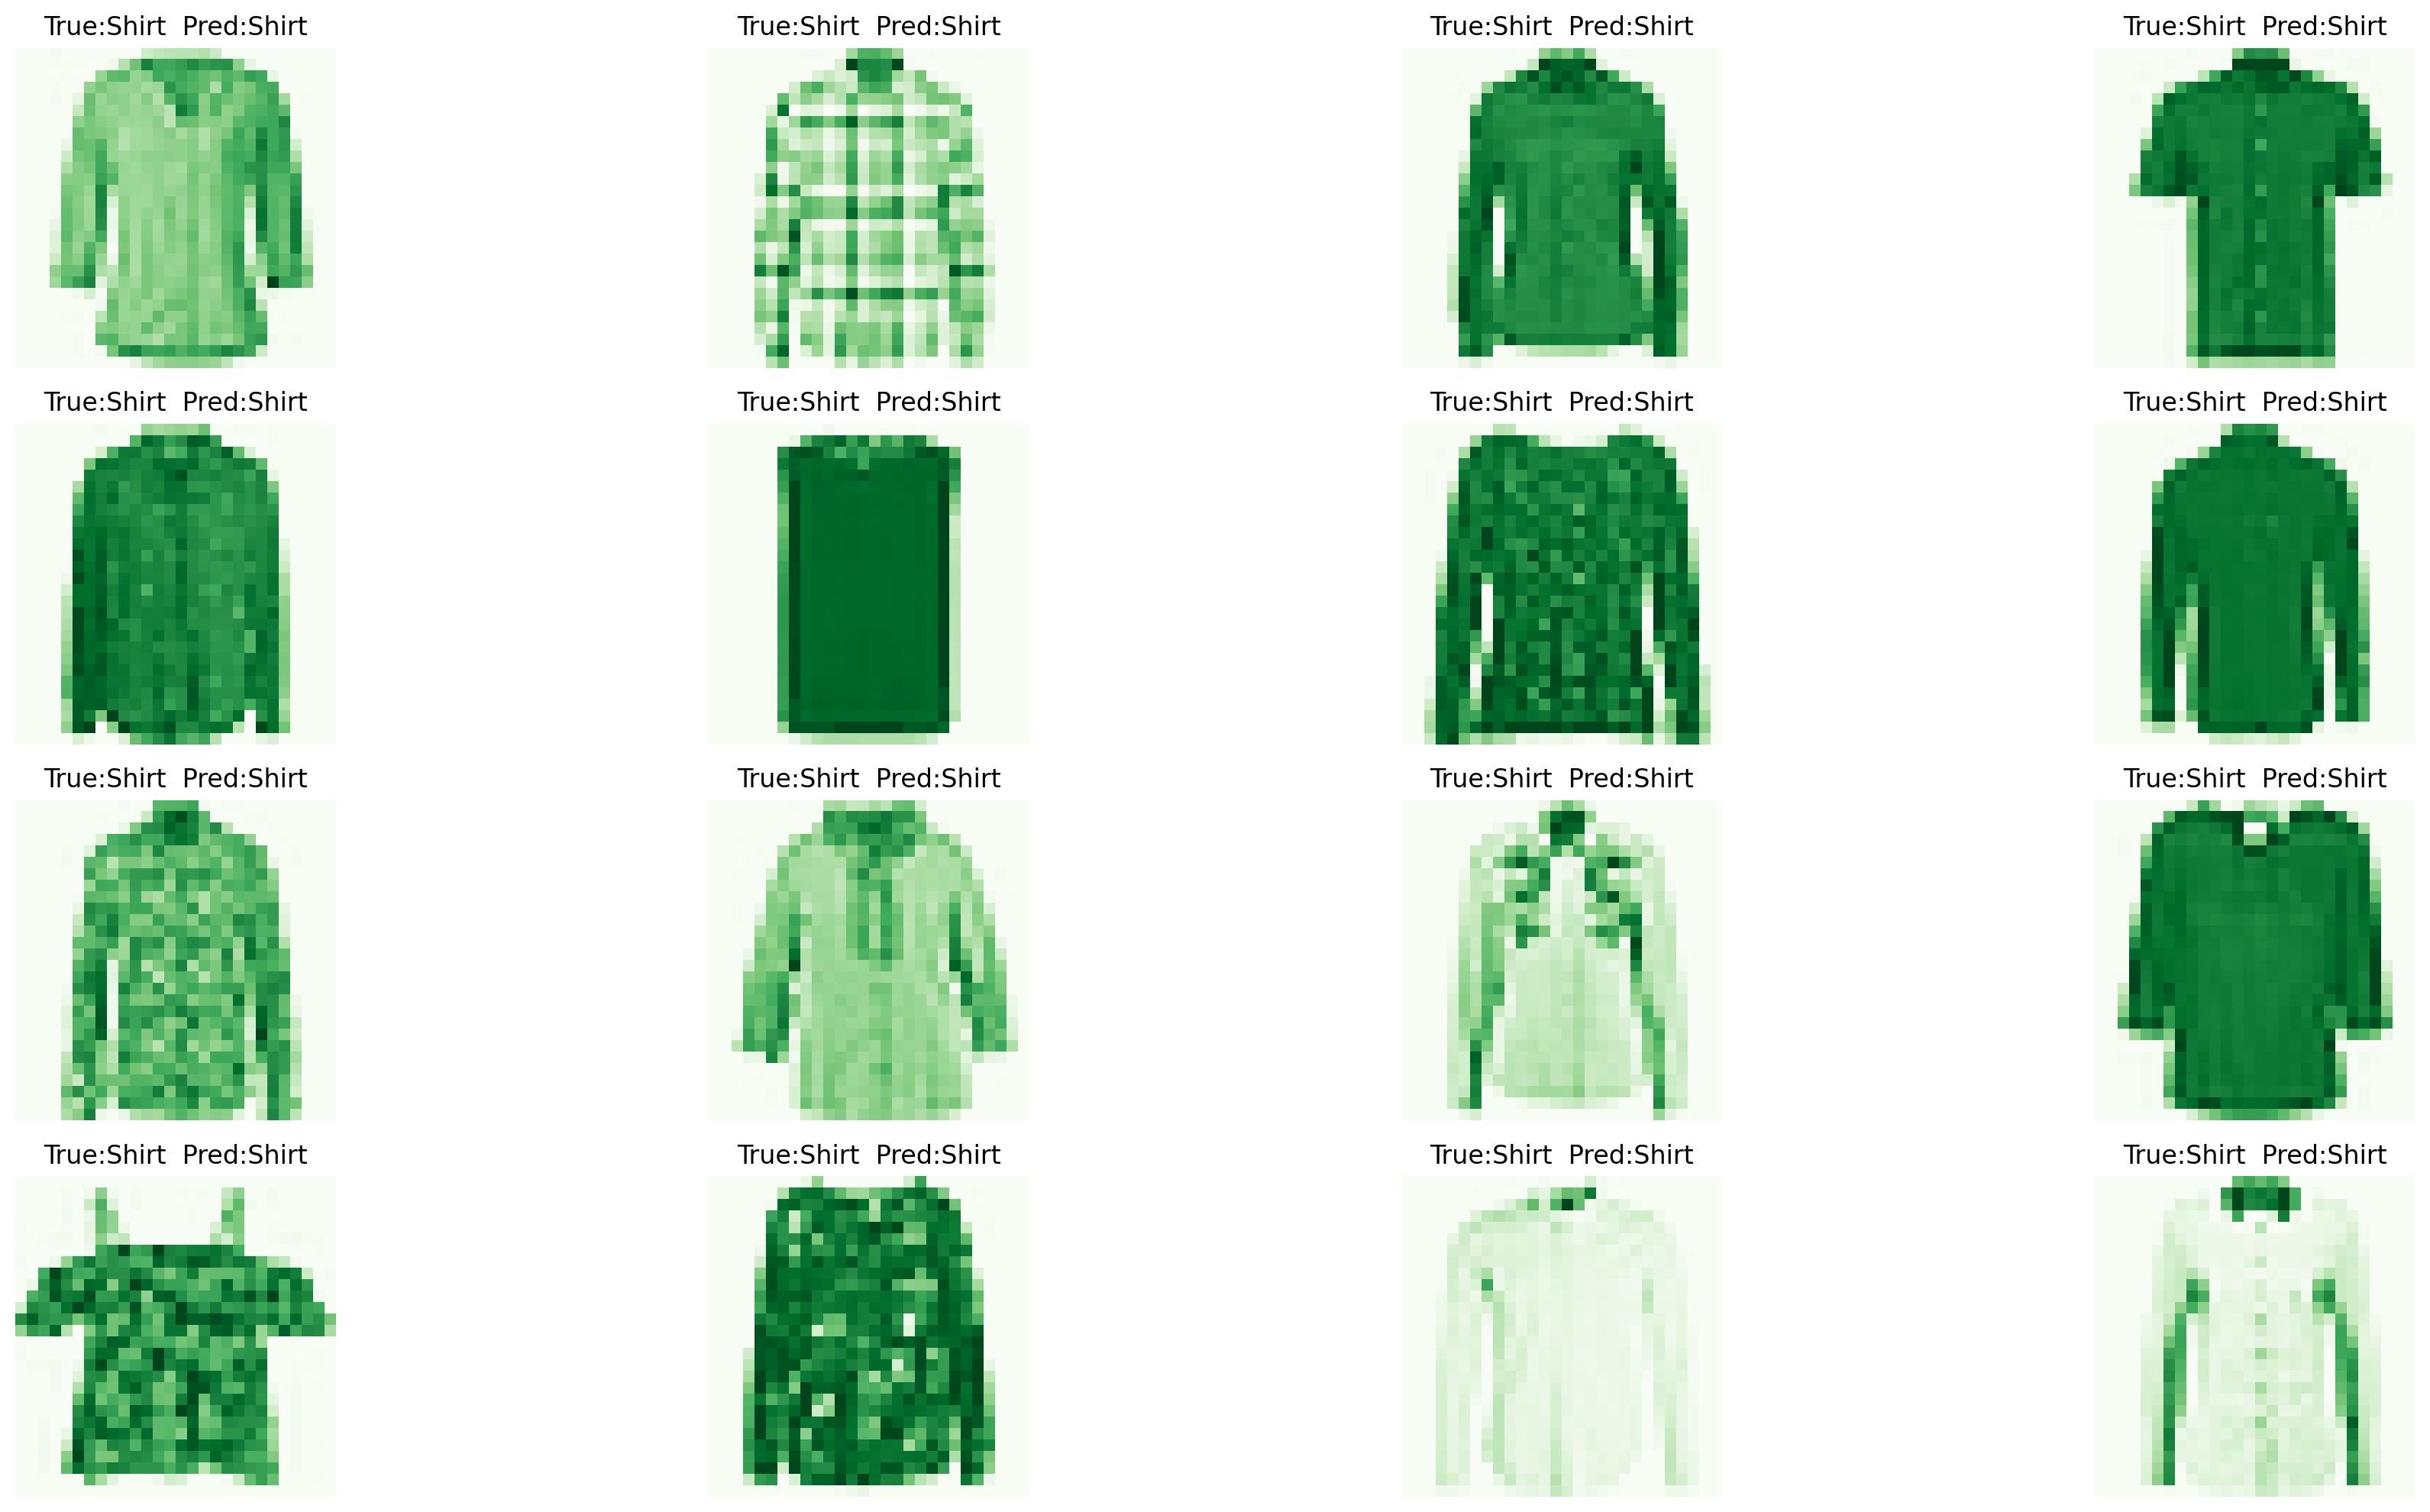

In [55]:
def plot_images2(data_index, cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4, 4, figsize=(20, 10), dpi=200)

    for i, indx in enumerate(data_index[:16]):
        ax[i // 4, i % 4].imshow(X_test[indx].reshape(28, 28), cmap=cmap)
        ax[i // 4, i % 4].axis('off')
        ax[i // 4, i % 4].set_title("True:{}  Pred:{}".format(labels[y_true_classes[indx]], labels[y_pred_classes[indx]]))

    plt.tight_layout()
    plt.show()


# Filter incorrect predictions for the "Shirt" class
incorrect_dress_indices1 = np.where((y_true_classes_labels == 'Shirt') & (y_true_classes_labels != y_pred_classes_labels))[0]

# Filter correct predictions for the "Shirt" class
correct_dress_indices1 = np.where((y_true_classes_labels == 'Shirt') & (y_true_classes_labels == y_pred_classes_labels))[0]

# Use the plot_images function to visualize correct predictions for "Shirt"
plot_images2(correct_dress_indices1, "Greens")

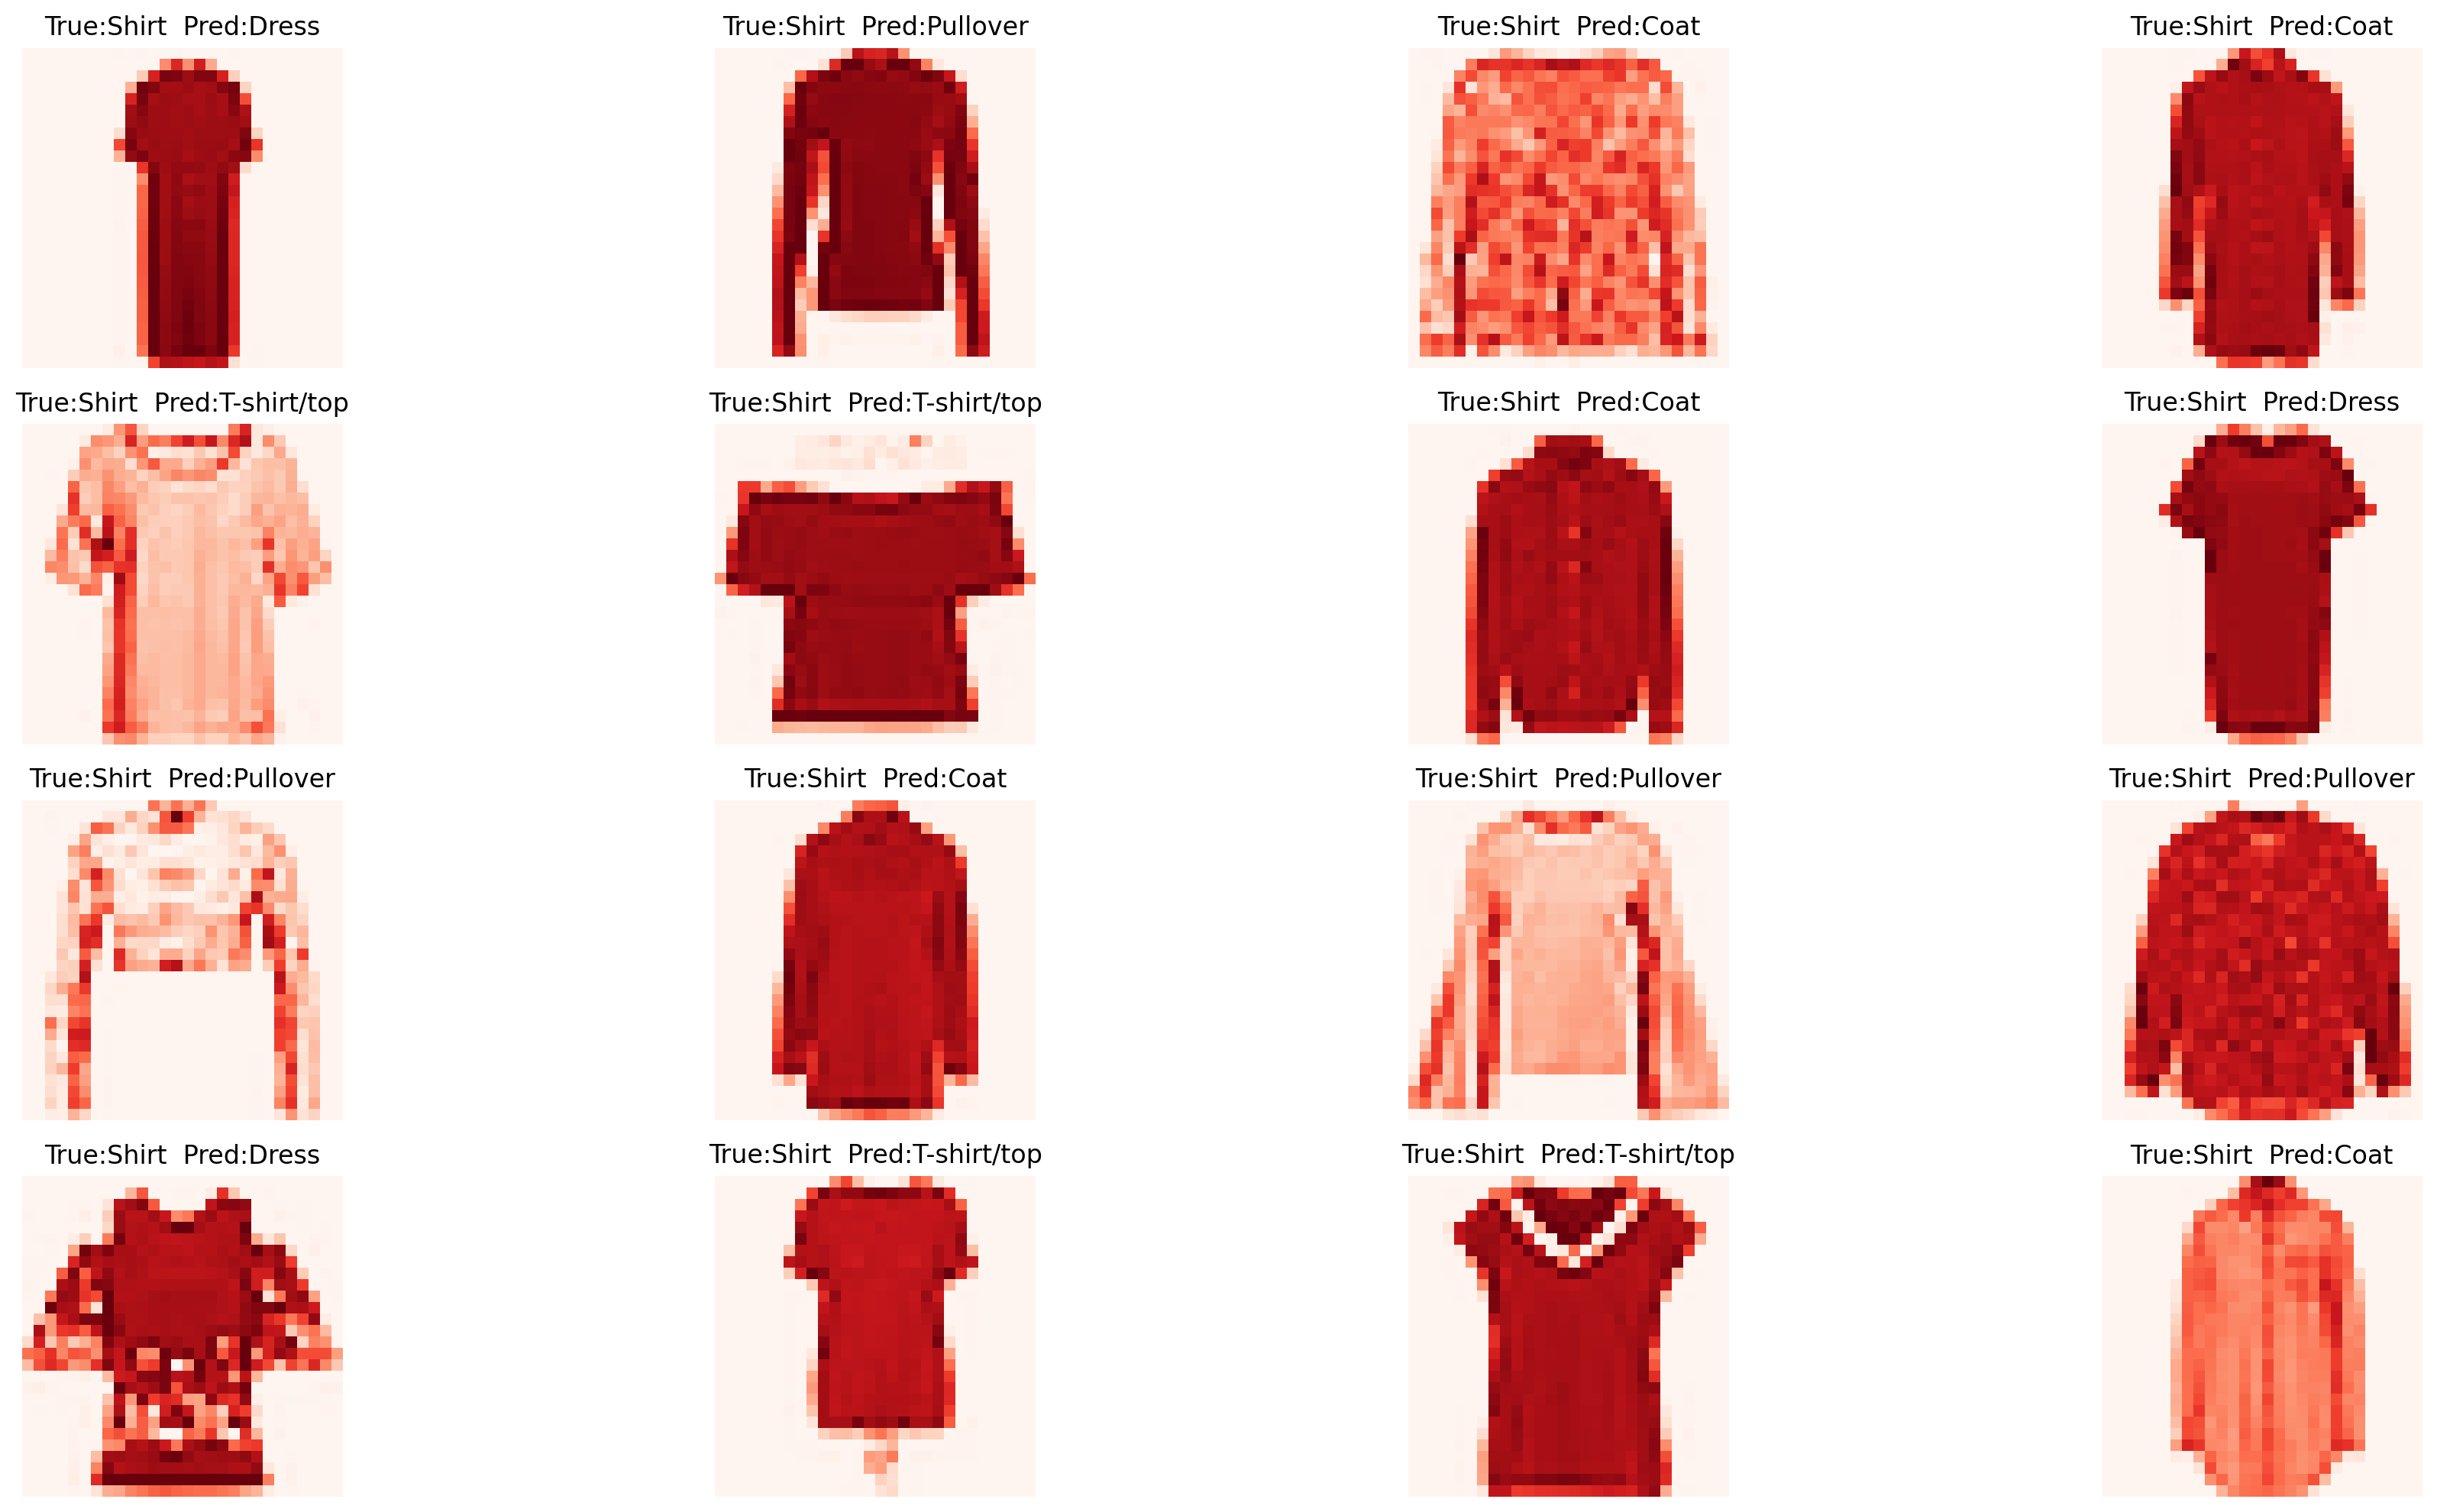

In [56]:
# Use the plot_images function to visualize incorrect predictions for "Shirt"
plot_images2(incorrect_dress_indices1, "Reds")